<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/ML_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploring Trends and Predictors in Patient Data to Uncover the Secrets of Sepsis Occurances.
### NAME: RICHARD MENSAH
### EMAIL: richard.mensah@azubiafrica.org
# Intro
## General
Machine learning allows the user to feed a computer algorithm an immense amount of data and have the computer analyze and make data-driven recommendations and decisions based on only the input data. 
In most of the situations we want to have a machine learning system to make **predictions**, so we have several categories of machine learning tasks depending on the type of prediction needed: **Classification, Regression, Clustering, Generation**, etc.

**Classification** is the task whose goal is the prediction of the label of the class to which the input belongs (e.g., Classification of images in two classes: cats and dogs).
**Regression** is the task whose goal is the prediction of numerical value(s) related to the input (e.g., House rent prediction, Estimated time of arrival ).
**Generation** is the task whose goal is the creation of something new related to the input (e.g., Text translation, Audio beat generation, Image denoising ). **Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar (in some sense) to each other than to those in other **clusters** (e.g., Clients clutering).

In machine learning, there are learning paradigms that relate to one aspect of the dataset: **the presence of the label to be predicted**. **Supervised Learning** is the paradigm of learning that is applied when the dataset has the label variables to be predicted, known as ` y variables`. **Unsupervised Learning** is the paradigm of learning that is applied when the dataset has not the label variables to be predicted. **Self-supervised Learning** is the paradigm of learning that is applied when part of the X dataset is considere as the label to be predicted (e.g., the Dataset is made of texts and the model try to predict the next word of each sentence).

## Notebook overview

This notebook is a guide to start practicing Machine Learning.

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# !pip install -q <lib_001> <lib_002> ...

In [4]:
!pip install xgboost

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\KOFI\AppData\Local\Programs\Python\Python311\Scripts\pip.exe\__main__.py", line 4, in <module>
ModuleNotFoundError: No module named 'pip'


## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [5]:
# Data handling
import pandas as pd
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# EDA (pandas-profiling, etc. )
...
#Data Splitting
from sklearn.model_selection import train_test_split, GridSearchCV

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


# Feature Processing (Scikit-learn processing, etc. )
...
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
import scipy.stats as stats

#
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import StandardScaler
# from collections import Counter

# #Models
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier

#Evaluation metrics
from sklearn.metrics import f1_score,roc_curve, auc,roc_auc_score

#saving model                            
import pickle

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os, pickle

import warnings
warnings.filterwarnings('ignore')

#  HYPOTHESIS

Hypothesis
- Hypothesis: Higher plasma glucose levels (PRG) are associated with an increased risk of developing sepsis. Justification: Elevated glucose levels have been linked to impaired immune function and increased susceptibility to infections, including sepsis.


- Hypothesis: Abnormal blood work results, such as high values of PL, SK, and BD2, are indicative of a higher likelihood of sepsis. Justification: Abnormal blood work results may indicate an ongoing infection or an inflammatory response, which are key factors in sepsis development.


- Hypothesis: Older patients are more likely to develop sepsis compared to younger patients. Justification: Advanced age is a known risk factor for sepsis, as the immune system weakens with age and may be less able to mount an effective response to infections.


- Hypothesis: Patients with higher body mass index (BMI) values (M11) have a lower risk of sepsis. Justification: Obesity has been associated with a dampened immune response, potentially leading to a decreased risk of developing sepsis.


- Hypothesis: Patients without valid insurance cards are more likely to develop sepsis. Justification: Lack of access to healthcare, as indicated by the absence of valid insurance, may delay or hinder early detection and treatment of infections, potentially increasing the risk of sepsis.


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [6]:
# For CSV, use pandas.read_csv
test = pd.read_csv("Paitients_Files_Test.csv")
train = pd.read_csv("Paitients_Files_Train.csv")

In [7]:
df = train.copy()

# Display the first few rows of the DataFrame
print(df.head())

          ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0  ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1  ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2  ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3  ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4  ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive


# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## PAITIENTS TEST CSV

In [8]:
test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [9]:
# Preview shape (number of columns and rows)
test.shape

(169, 10)

In [10]:
# Check for duplicates
test.duplicated().sum()

0

In [11]:
# Checking statistical data of test_csv
test.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,3.917160,123.520710,70.426036,20.443787,81.000000,32.249704,0.438876,33.065089,0.727811
std,3.402415,29.259123,19.426805,15.764962,110.720852,7.444886,0.306935,11.548110,0.446410
min,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,102.000000,62.000000,0.000000,0.000000,27.600000,0.223000,24.000000,0.000000
50%,3.000000,120.000000,74.000000,23.000000,0.000000,32.400000,0.343000,28.000000,1.000000
75%,6.000000,141.000000,80.000000,32.000000,135.000000,36.600000,0.587000,42.000000,1.000000
max,13.000000,199.000000,114.000000,49.000000,540.000000,57.300000,1.698000,70.000000,1.000000


In [12]:
# check how many missing/null values in each variable
test.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [13]:
test.value_counts()

ID         PRG  PL   PR   SK  TS   M11   BD2    Age  Insurance
ICU200609  1    109  38   18  120  23.1  0.407  26   1            1
ICU200725  7    187  50   33  392  33.9  0.826  34   0            1
ICU200717  2    127  46   21  335  34.4  0.176  22   1            1
ICU200718  9    164  78   0   0    32.8  0.148  45   1            1
ICU200719  2    93   64   32  160  38.0  0.674  23   1            1
                                                                 ..
ICU200667  1    120  80   48  200  38.9  1.162  41   1            1
ICU200668  11   127  106  0   0    39.0  0.190  51   1            1
ICU200669  3    80   82   31  70   34.2  1.292  27   1            1
ICU200670  10   162  84   0   0    27.7  0.182  54   0            1
ICU200777  1    93   70   31  0    30.4  0.315  23   1            1
Length: 169, dtype: int64

In [14]:
# Checking datatypes in test_csv
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


## TRAIN  DATASET

In [15]:
# changing columns names 

# Rename the columns
train = train.rename(columns={
    "PRG": "Plasma_glucose",
    "PL": "Blood_Work_Result_1",
    "PR": "Blood_Pressure",
    "SK": "Blood_Work_Result_2",
    "TS": "Blood_Work_Result_3",
    "M11": "BMI",
    "BD2": "Blood_Work_Result_4",
    "Age": "Patient_age",
    "Sepssis": "Sepsis"
})

In [16]:
train.head()

,ID,Plasma_glucose,Blood_Work_Result_1,Blood_Pressure,Blood_Work_Result_2,Blood_Work_Result_3,BMI,Blood_Work_Result_4,Patient_age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


ID: Unique number to represent patient ID

PRG: Plasma glucose

PL: Blood Work Result-1 (mu U/ml)

PR: Blood Pressure (mm Hg)

SK: Blood Work Result-2 (mm)

TS: Blood Work Result-3 (mu U/ml)

M11: Body mass index (weight in kg/(height in m)^2

BD2: Blood Work Result-4 (mu U/ml)

Age : patients age (years)

Insurance: If a patient holds a valid insurance card

Sepsis; Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

In [17]:
#Check dataset dimension 
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 599
Number of columns: 11


In [18]:
# Preview shape i.e number of columns and rows
#df_train.shape

In [19]:
# Check for duplicates values in train data
#df_train.duplicated().sum()

In [20]:
#check how many missing/null values in each variable
#df_train.isnull().sum()

In [21]:
# Checking statistical data
#train.describe()

#Explore the summary statistics of numerical columns:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [22]:
# Checking datatypes in train_csv
#train.info()

In [23]:
# Checking the columns names if fit for descriptive analysis
train.columns.values

array(['ID', 'Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'BMI',
       'Blood_Work_Result_4', 'Patient_age', 'Insurance', 'Sepsis'],
      dtype=object)

### from the .info() to view the data types, the numeric columns have all required int and float datatypes whiles the categorical column is in string/object datatype. This indicate that none of the datatypes will be converted.

### Data Issues
 Both the train and test CSV datasets do not have null values, missing values and mismatched datatype, how the two day types are clearn to perform explorary data analysis

## Univariate Analysis
Here is the section to explore, analyze, visualize each variable independently of the others.

In [24]:
# Code here

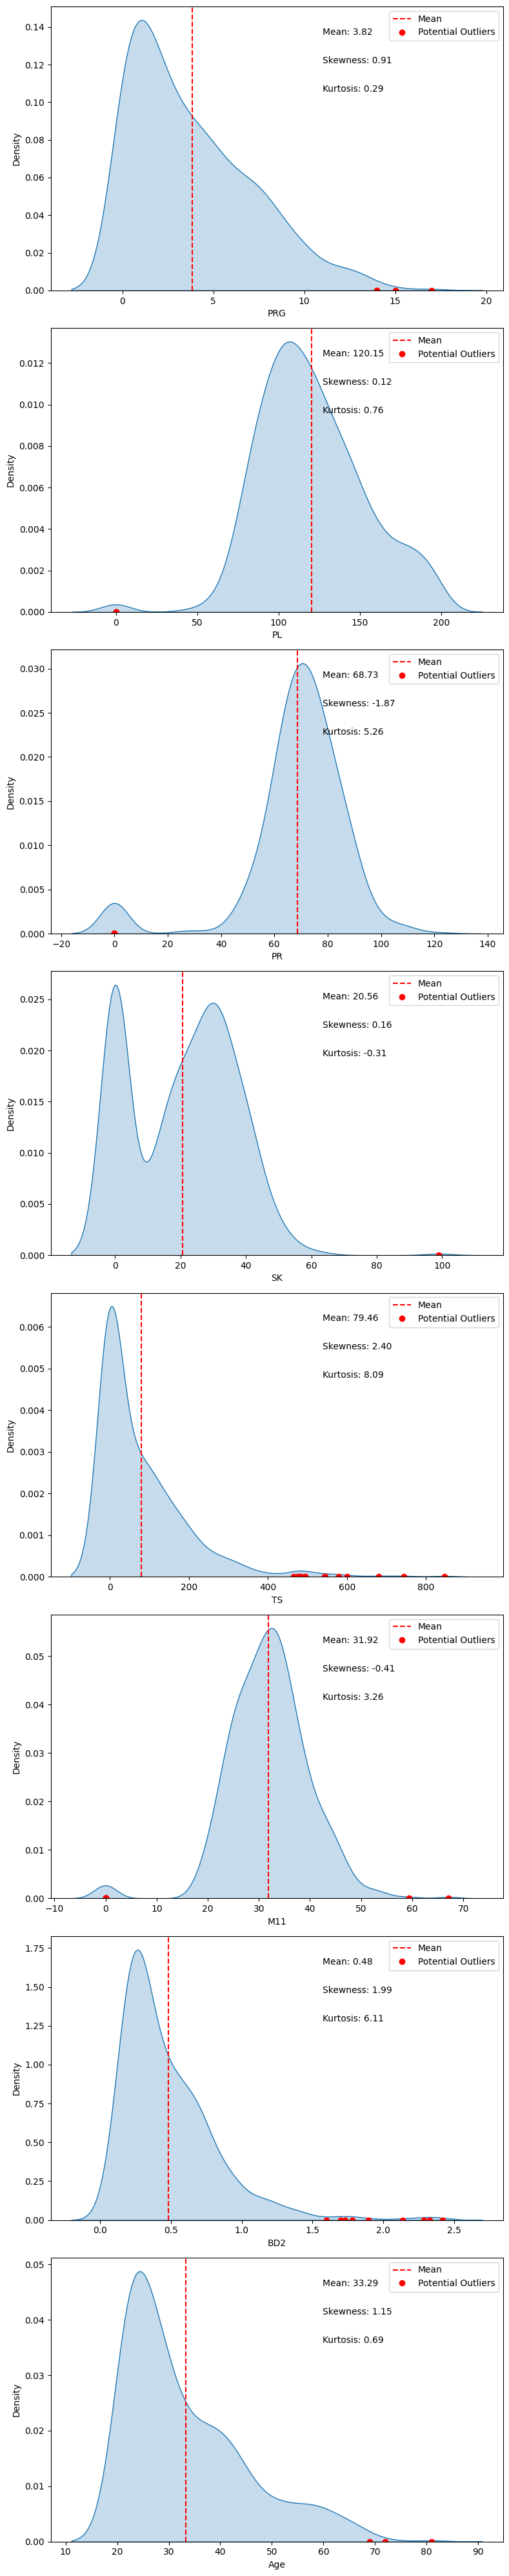

In [25]:
# Select columns to plot
cols_to_plot = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']

# Plot KDEs(kernel density estimation) for all columns
fig, axes = plt.subplots(nrows=len(cols_to_plot), figsize=(8, 40))
for i, col in enumerate(cols_to_plot):
    sns.kdeplot(data=df, x=col, ax=axes[i], fill=True)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
    # Calculate mean, skewness, and kurtosis
    mean_val = df[col].mean()
    skewness_val = df[col].skew()
    kurtosis_val = df[col].kurtosis()
    
    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)
    
    # Add mean line
    axes[i].axvline(mean_val, color='red', linestyle='--', label='Mean')
    
    # Add red dots to indicate potential outliers
    outliers = df[(df[col] > mean_val + 3 * df[col].std()) | (df[col] < mean_val - 3 * df[col].std())]
    axes[i].plot(outliers[col], [0] * len(outliers), 'ro', label='Potential Outliers')
    
    # Add legend
    axes[i].legend()
    
plt.tight_layout()
plt.show()


Based on the KDE plot analysis of the PRG variable, it appears that the distribution is positively skewed, suggesting the presence of some higher values. The distribution is also platykurtic, indicating a flatter peak and lighter tails compared to a normal distribution.

Based on the KDE plot analysis of the PL variable, it appears that the distribution is approximately symmetric, with a mean value of 120.15. The distribution is mesokurtic, suggesting a similar shape to a normal distribution.

The kde plot suggests that the blood pressure distribution is negatively skewed and has a more peaked shape with possible outliers.

The kde plot suggests that the distribution of blood work result 2 is slightly positively skewed and has a flatter shape.This suggests that the distribution has fewer outliers or extreme values.

The kde plot suggests that the distribution of TS (blood work result 3) is positively skewed and has a more peaked shape with heavier tails.This means that the tail of the distribution is extended to the right, indicating a higher frequency of lower values compared to higher values.This suggests that the distribution has more outliers or extreme values.

The kde plot suggests that the distribution of body mass index is slightly negatively skewed and has a more peaked shape with heavier tails.This means that the tail of the distribution is extended to the left, indicating a higher frequency of higher values compared to lower values. This suggests that the distribution has more outliers or extreme values.
The kde plot indicates a positively skewed distribution for the blood work result with a more peaked shape and heavier tails.This indicates a higher frequency of extreme values or outliers.This means that the tail of the distribution is extended to the right, suggesting a higher frequency of lower values compared to higher values.

The kde plot indicates a positively skewed distribution of age, with a higher frequency of younger individuals. This indicates a more uniform spread of values without significant outliers or extreme values.This suggests that the tail of the distribution is extended to the right, indicating a higher frequency of younger individuals compared to older individuals.

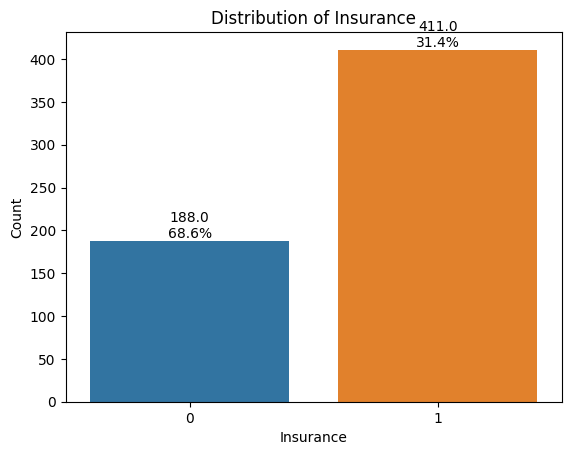

In [26]:
# Count plot for "Insurance"
sns.countplot(data=df, x='Insurance')

# Set labels
plt.xlabel('Insurance')
plt.ylabel('Count')

# Set title
plt.title('Distribution of Insurance')

# Calculate percentage distribution
total = len(df['Insurance'])
percentages = df['Insurance'].value_counts(normalize=True) * 100

# Add data labels and percentage annotations
for p, percentage in zip(plt.gca().patches, percentages):
    count = p.get_height()
    percentage_label = f'{percentage:.1f}%'
    plt.gca().annotate(f'{count}\n{percentage_label}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


plt.show()


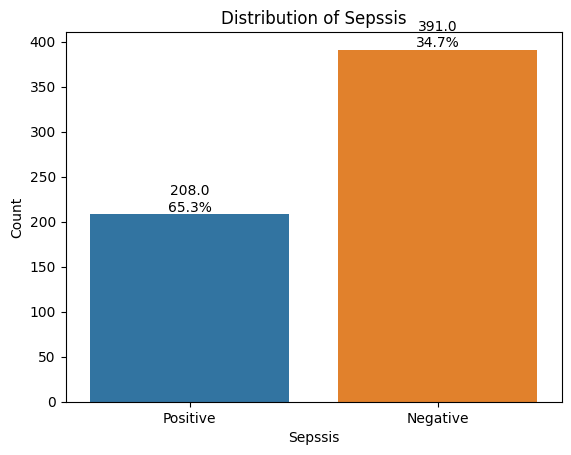

In [27]:
# Count plot for "Sepssis"
sns.countplot(data=df, x='Sepssis')

# Set labels
plt.xlabel('Sepssis')
plt.ylabel('Count')

# Set title
plt.title('Distribution of Sepssis')

# Calculate percentage distribution
total = len(df['Sepssis'])
percentages = df['Sepssis'].value_counts(normalize=True) * 100

# Add data labels and percentage annotations
for p, percentage in zip(plt.gca().patches, percentages):
    count = p.get_height()
    percentage_label = f'{percentage:.1f}%'
    plt.gca().annotate(f'{count}\n{percentage_label}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

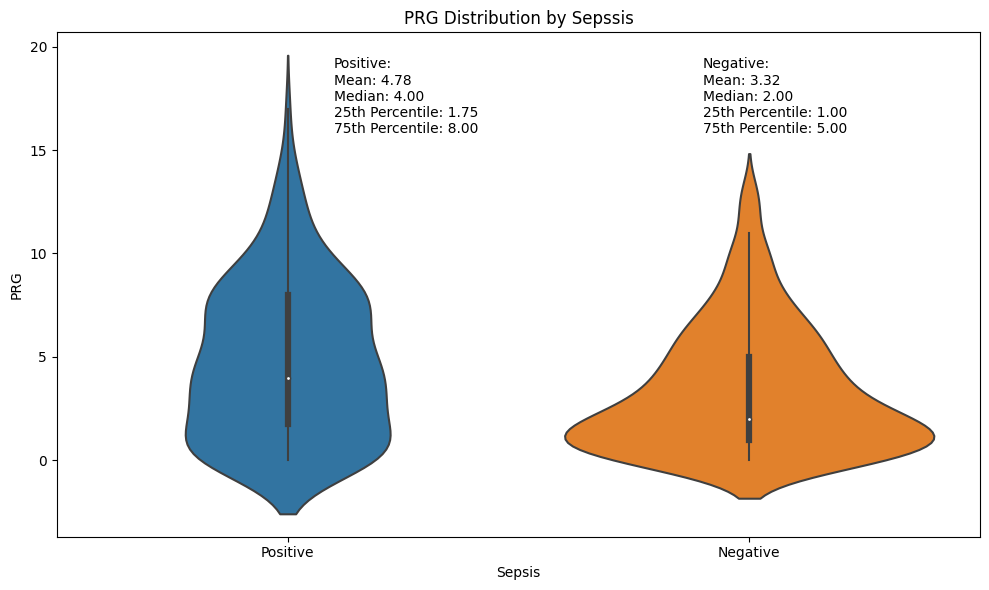

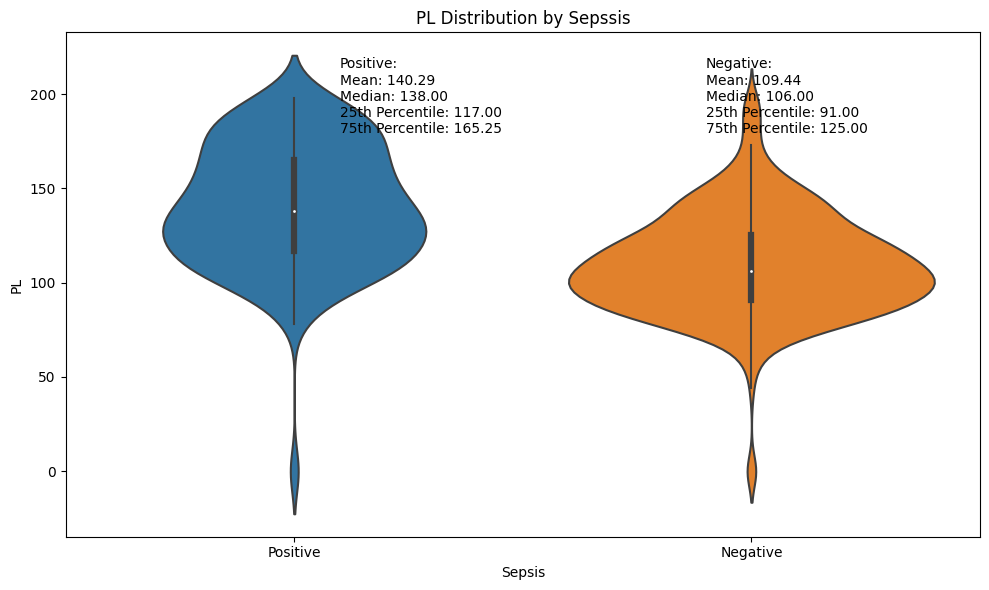

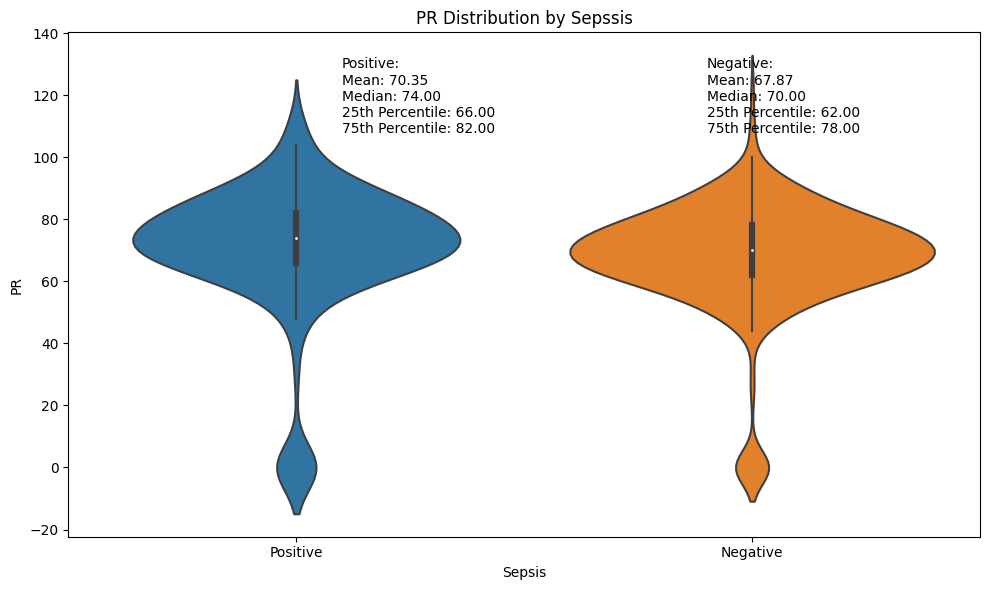

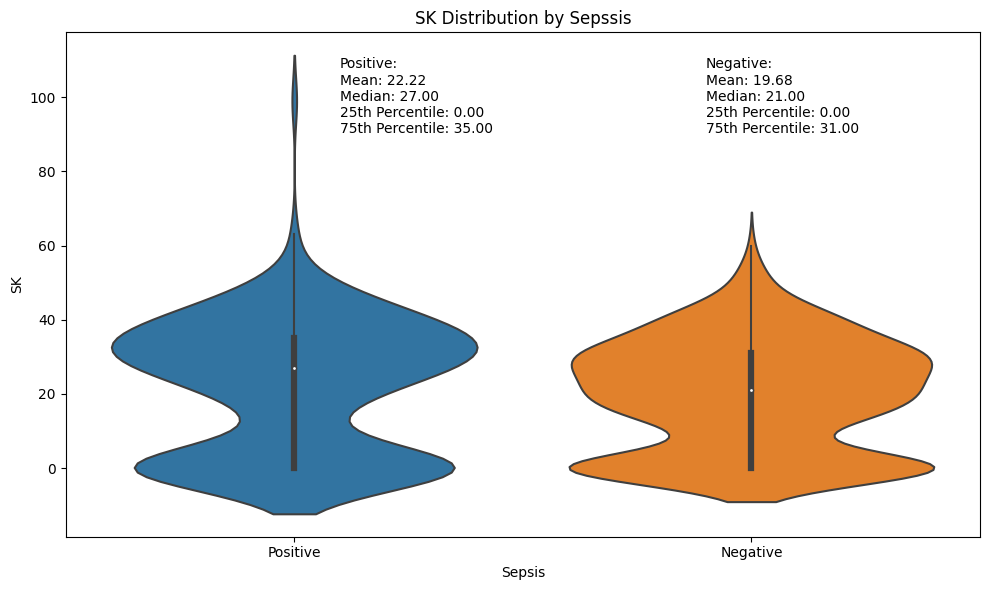

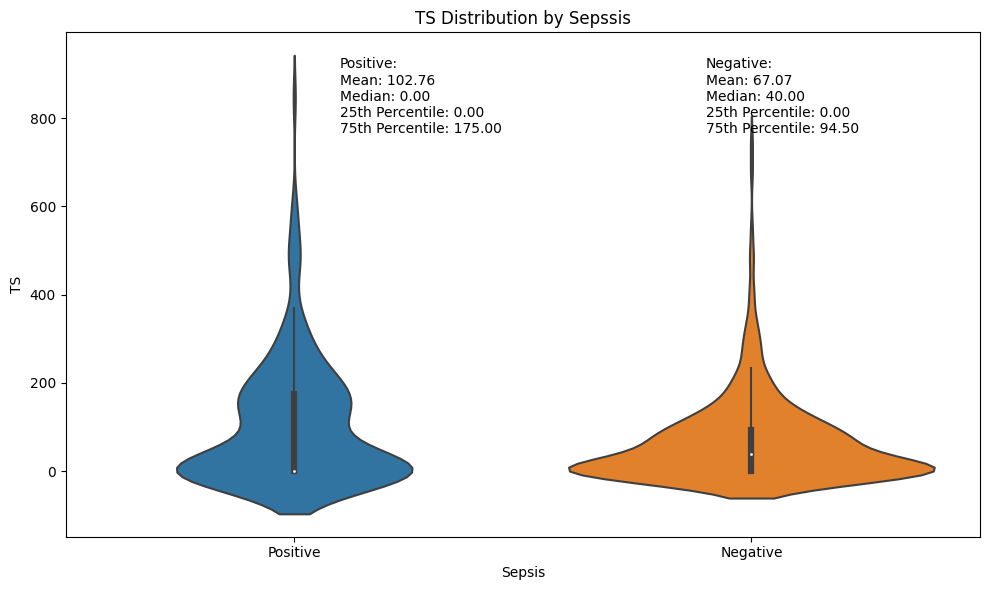

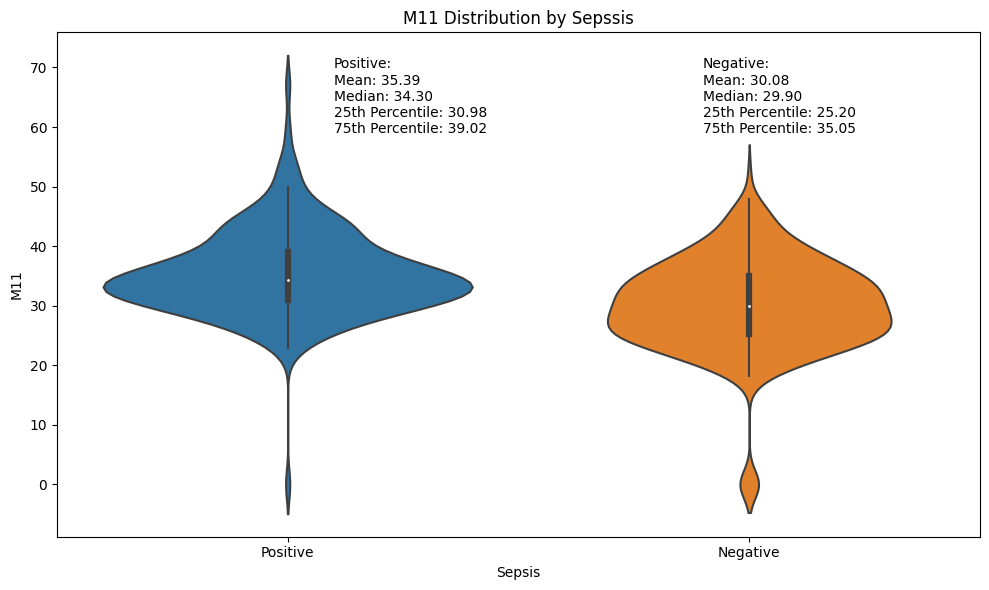

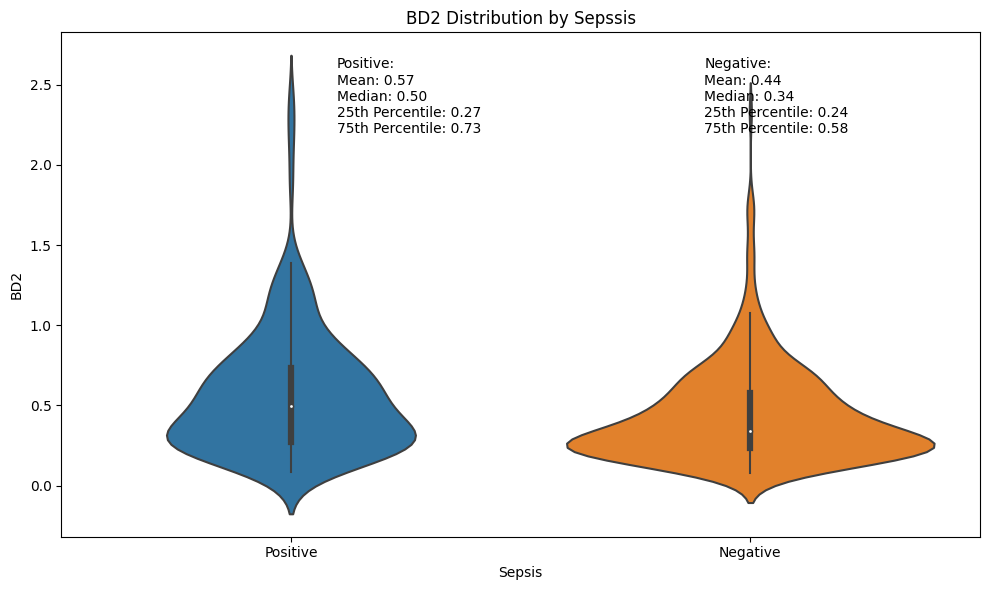

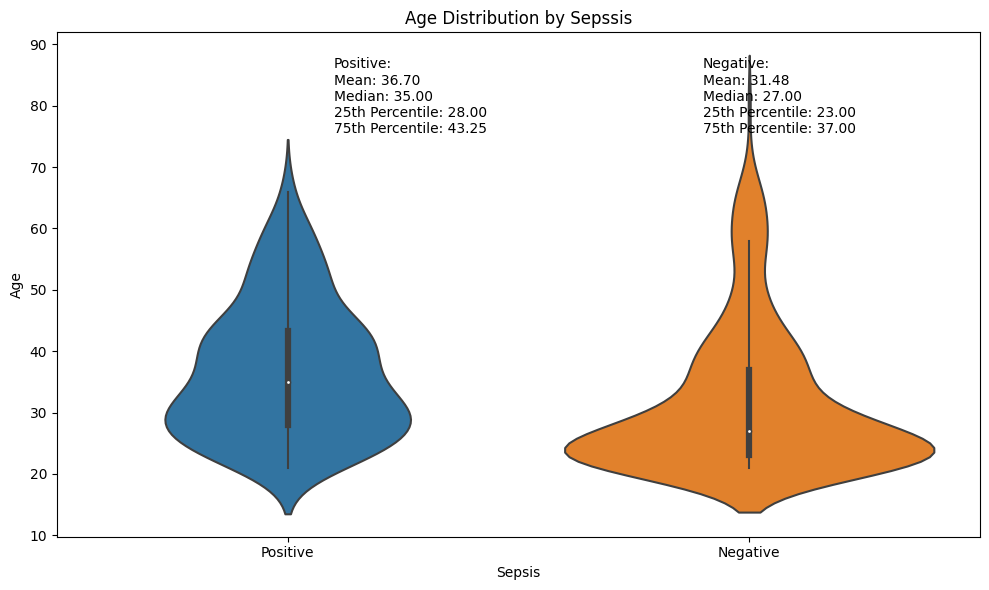

In [28]:
# Numerical Variables - Violin plots with statistics
numerical_vars = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df, x='Sepssis', y=var)
    plt.xlabel('Sepsis')
    plt.ylabel(var)
    plt.title(f'{var} Distribution by Sepssis')
    
    # Calculate statistics
    positive_vals = df[df['Sepssis'] == 'Positive'][var]
    negative_vals = df[df['Sepssis'] == 'Negative'][var]
    stat_dict = {
        'Positive': {
            'Mean': np.mean(positive_vals),
            'Median': np.median(positive_vals),
            '25th Percentile': np.percentile(positive_vals, 25),
            '75th Percentile': np.percentile(positive_vals, 75)
        },
        'Negative': {
            'Mean': np.mean(negative_vals),
            'Median': np.median(negative_vals),
            '25th Percentile': np.percentile(negative_vals, 25),
            '75th Percentile': np.percentile(negative_vals, 75)
        }
    }
    
    # Add statistics as text annotations
    plt.text(0.30, 0.8, f"Positive:\nMean: {stat_dict['Positive']['Mean']:.2f}\nMedian: {stat_dict['Positive']['Median']:.2f}\n25th Percentile: {stat_dict['Positive']['25th Percentile']:.2f}\n75th Percentile: {stat_dict['Positive']['75th Percentile']:.2f}", transform=plt.gca().transAxes)
    plt.text(0.70, 0.8, f"Negative:\nMean: {stat_dict['Negative']['Mean']:.2f}\nMedian: {stat_dict['Negative']['Median']:.2f}\n25th Percentile: {stat_dict['Negative']['25th Percentile']:.2f}\n75th Percentile: {stat_dict['Negative']['75th Percentile']:.2f}", transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()



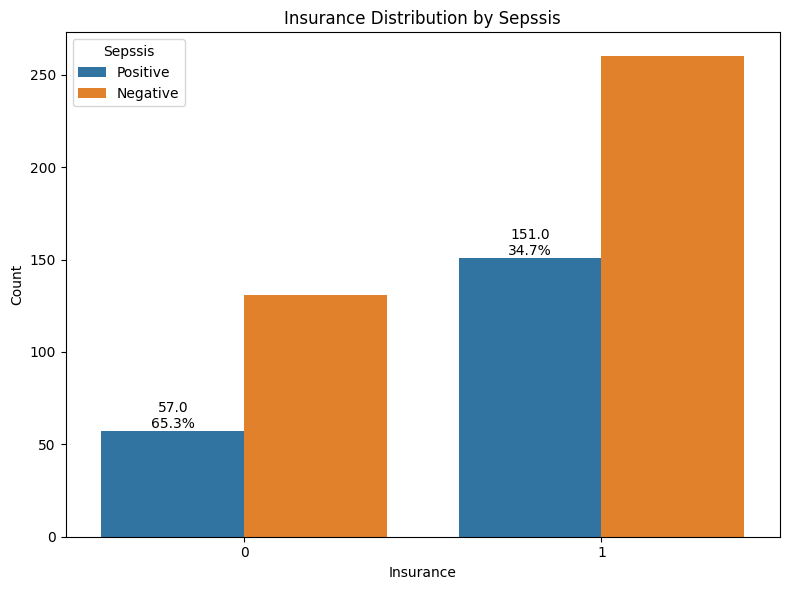

In [29]:
# Categorical Variables - Bar plots
categorical_vars = ['Insurance']
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=var, hue='Sepssis')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'{var} Distribution by Sepssis')

    # Calculate percentage distribution
    total = len(df['Sepssis'])
    percentages = df['Sepssis'].value_counts(normalize=True) * 100

    # Add data labels and percentage annotations
    for p, percentage in zip(plt.gca().patches, percentages):
        count = p.get_height()
        percentage_label = f'{percentage:.1f}%'
        plt.gca().annotate(f'{count}\n{percentage_label}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

In [30]:
# Encoding the target variable
df['Sepssis_Encoded'] = df['Sepssis'].map({'Negative': 0, 'Positive': 1})

# Calculate correlation coefficients
numerical_vars = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']
correlations = df[numerical_vars + ['Sepssis_Encoded']].corr()

# Print correlation coefficients
for var in numerical_vars:
    correlation = correlations.loc[var, 'Sepssis_Encoded']
    print(f"Pearson correlation between 'Sepssis_Encoded' and '{var}': {correlation:.2f}")


Pearson correlation between 'Sepssis_Encoded' and 'PRG': 0.21
Pearson correlation between 'Sepssis_Encoded' and 'PL': 0.45
Pearson correlation between 'Sepssis_Encoded' and 'PR': 0.06
Pearson correlation between 'Sepssis_Encoded' and 'SK': 0.08
Pearson correlation between 'Sepssis_Encoded' and 'TS': 0.15
Pearson correlation between 'Sepssis_Encoded' and 'M11': 0.32
Pearson correlation between 'Sepssis_Encoded' and 'BD2': 0.18
Pearson correlation between 'Sepssis_Encoded' and 'Age': 0.21
Pearson correlation between 'Sepssis_Encoded' and 'Insurance': 0.06


Let's analyze the correlations between the 'Sepssis_Encoded' variable and each of the other variables:

'PRG': The correlation coefficient of 0.21 suggests a weak positive correlation between plasma glucose levels and the likelihood of developing sepsis. However, the correlation is not very strong.

'PL': The correlation coefficient of 0.45 indicates a moderate positive correlation between attribute 2 (blood work result-1) and the likelihood of developing sepsis. This suggests that higher values of PL are associated with a higher likelihood of sepsis.

'PR': The correlation coefficient of 0.06 indicates a very weak positive correlation between blood pressure and the likelihood of developing sepsis. The correlation is close to zero, suggesting that there is no meaningful relationship between these variables.

'SK': The correlation coefficient of 0.08 suggests a very weak positive correlation between attribute 4 (blood work result-2) and the likelihood of developing sepsis. The correlation is close to zero, indicating no significant relationship.

'TS': The correlation coefficient of 0.15 indicates a weak positive correlation between attribute 5 (blood work result-3) and the likelihood of developing sepsis. The correlation is not very strong, suggesting a limited relationship.

'M11': The correlation coefficient of 0.32 indicates a moderate positive correlation between body mass index (BMI) and the likelihood of developing sepsis. This suggests that higher BMI values are associated with a higher likelihood of sepsis.

'BD2': The correlation coefficient of 0.18 suggests a weak positive correlation between attribute 7 (blood work result-4) and the likelihood of developing sepsis. The correlation is not very strong, indicating a limited relationship.

'Age': The correlation coefficient of 0.21 suggests a weak positive correlation between age and the likelihood of developing sepsis. This implies that older patients may have a slightly higher likelihood of sepsis.

'Insurance': The correlation coefficient of 0.06 indicates a very weak positive correlation between insurance status and the likelihood of developing sepsis. The correlation is close to zero, suggesting no significant relationship.

In summary, the analysis of the correlations suggests that attributes such as PL, M11 (BMI), and age may have a moderate positive correlation with the likelihood of developing sepsis. However, the other variables have either weak or very weak correlations, indicating limited or no meaningful relationship with sepsis development.

<AxesSubplot: xlabel='Plasma_glucose'>

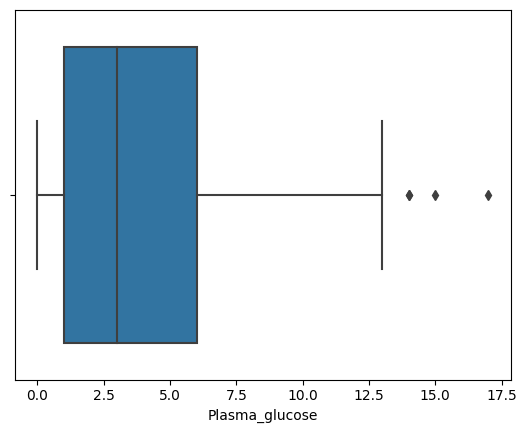

In [31]:
# Handle outliers in numerical columns
sns.boxplot(x=train['Plasma_glucose'])

<AxesSubplot: xlabel='Blood_Pressure'>

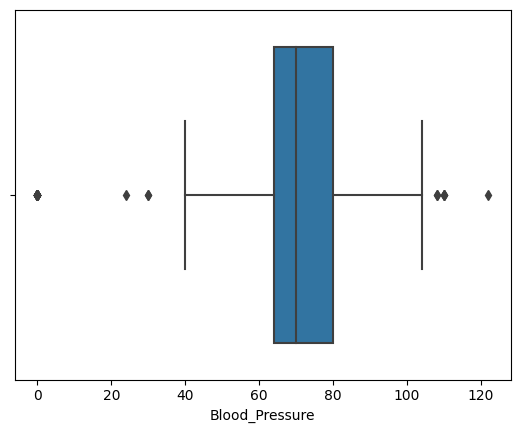

In [32]:
sns.boxplot(x=train['Blood_Pressure'])

<AxesSubplot: xlabel='BMI'>

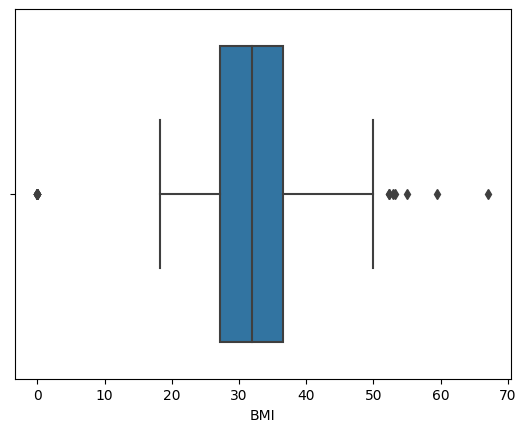

In [33]:
sns.boxplot(x=train['BMI'])

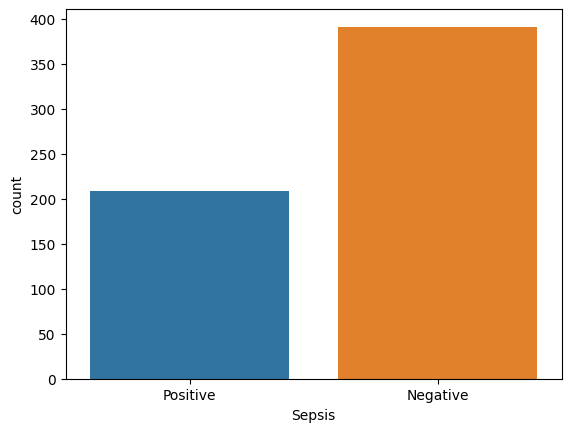

In [34]:
sns.countplot(x='Sepsis', data=train)
plt.show()

## Bivariate & Multivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others.

In [35]:
# Code here

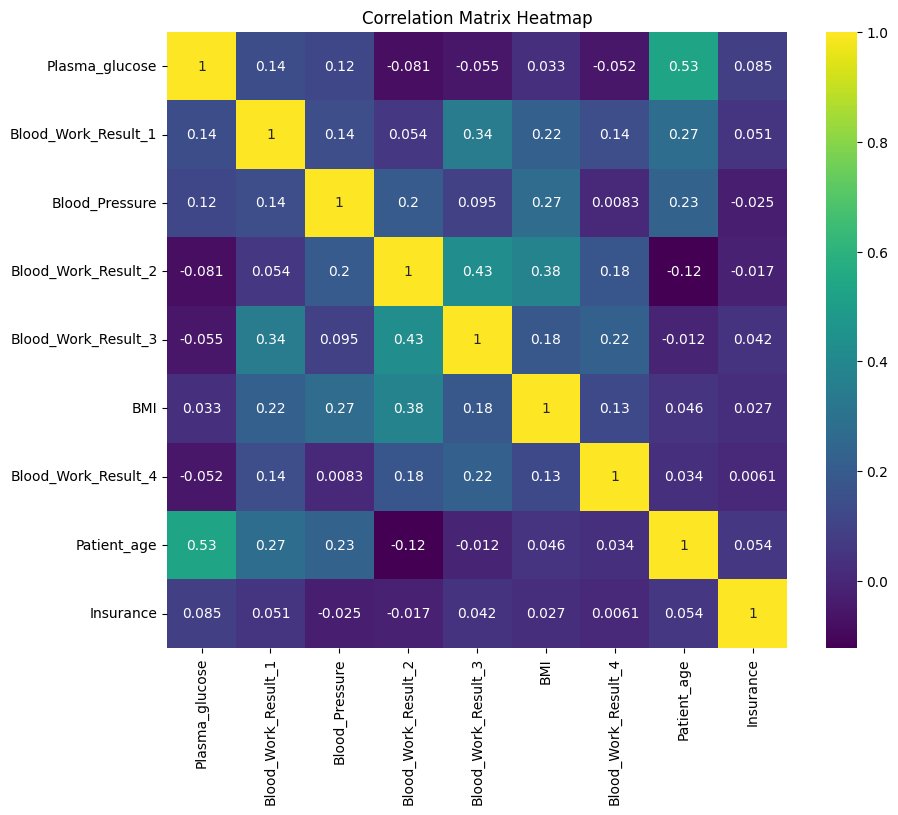

In [36]:
# Check for multicollinearity between predictor variables
corr =  train.corr()
#correlations = df[numerical_vars + ['Sepssis_Encoded']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True, cmap='viridis')
plt.title('Correlation Matrix Heatmap')
plt.show()

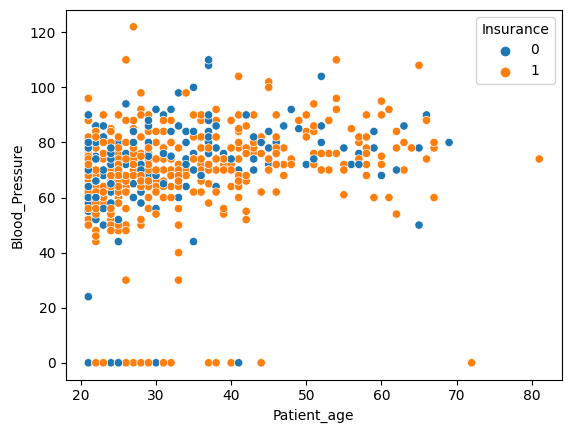

In [37]:
# Plot a scatterplot of Patience with Blood_Pressure who has insurance
sns.scatterplot(x='Patient_age', y='Blood_Pressure', data=train, hue='Insurance')
plt.show()

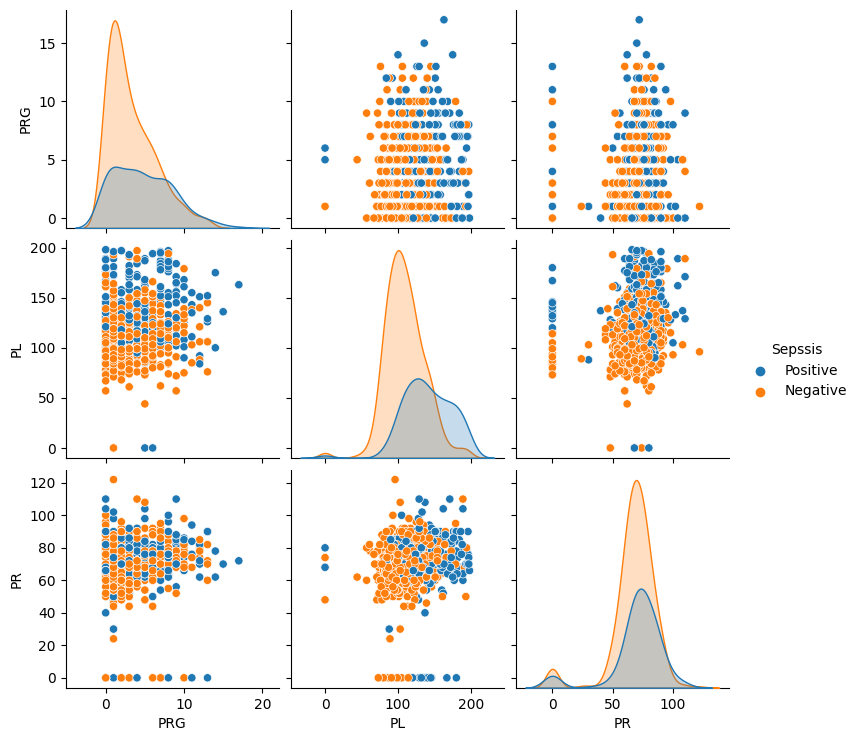

In [38]:
numerical_vars = ['PRG', 'PL', 'PR']
sns.pairplot(data=df, vars=numerical_vars, hue='Sepssis')

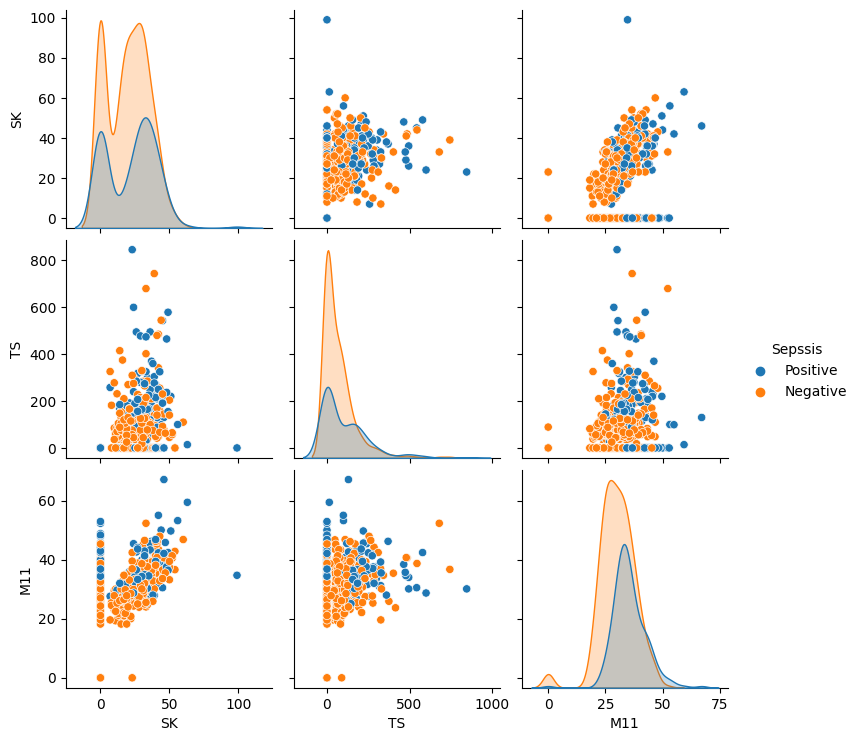

In [39]:
numerical_vars = ['SK', 'TS', 'M11']
sns.pairplot(data=df, vars=numerical_vars, hue='Sepssis')

Text(0.5, 1.0, 'Patients Age and Sepsis Status')

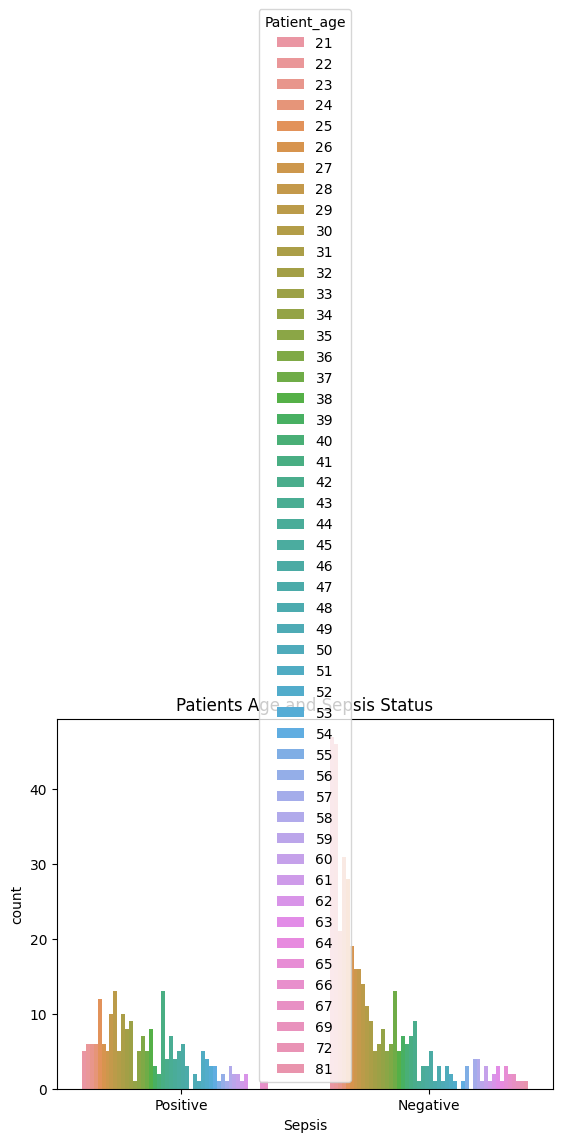

In [40]:
# Count plot showing patients age and sepsis status 
sns.countplot(x='Sepsis', hue='Patient_age', data=train)
plt.title('Patients Age and Sepsis Status')

In [41]:
# Count plot showing patients age and sepsis status 
#sns.countplot(x='Patient_age', hue='Sepsis', data=train)
#plt.title('Patients Age and Sepsis Status')

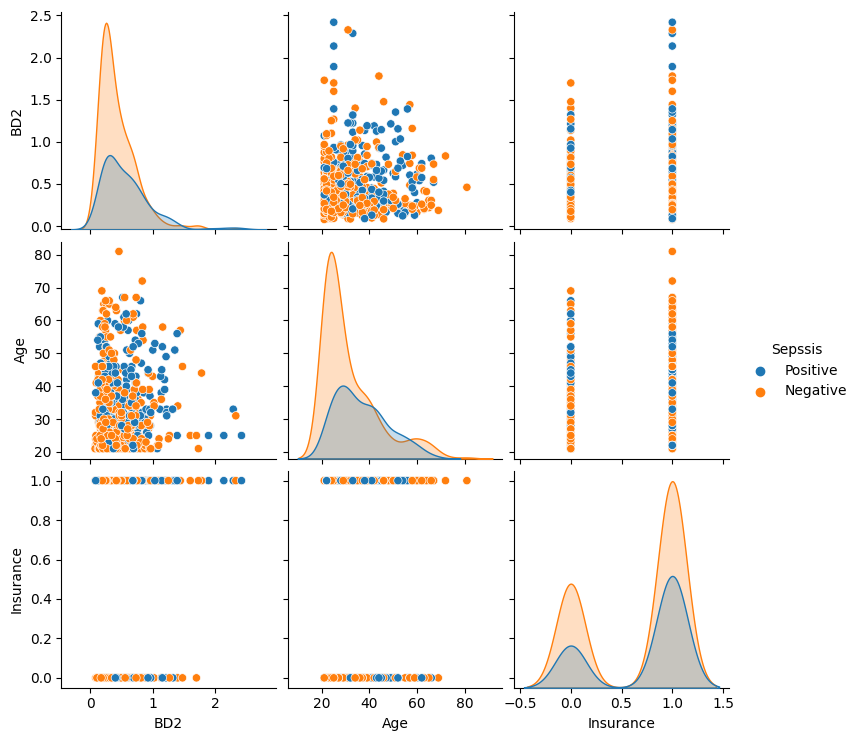

In [42]:
numerical_vars = ['BD2', 'Age', 'Insurance']
sns.pairplot(data=df, vars=numerical_vars, hue='Sepssis')

Text(0.5, 1.0, 'Insurance Cover by Patients Sepsis Status')

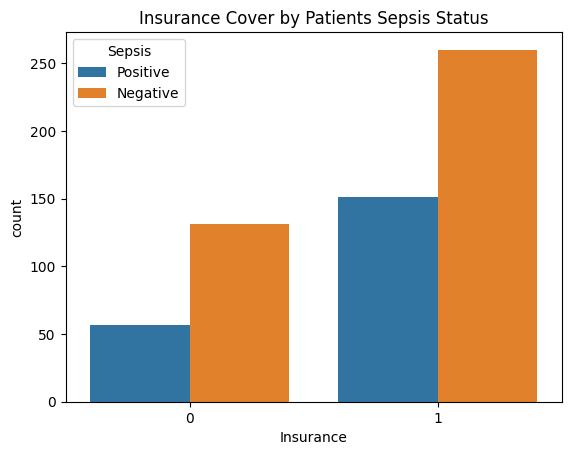

In [43]:
# Count plot showing patients sepsis status and insurance cover 
sns.countplot(x='Insurance', hue='Sepsis', data=train)
plt.title('Insurance Cover by Patients Sepsis Status')

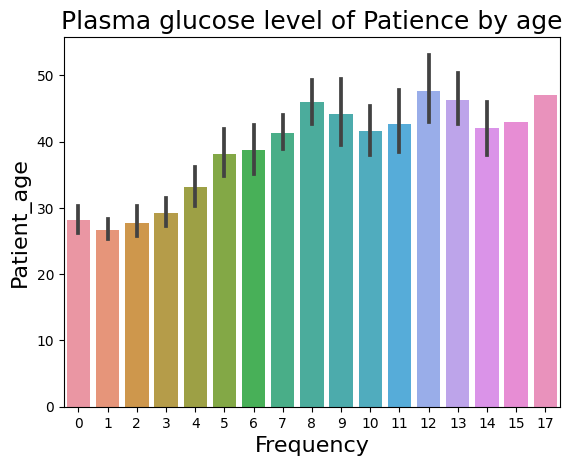

In [44]:
# Create a boxplot of the 'Blood_Pressure' column grouped by 'Plasma_glucose'
sns.barplot(x='Plasma_glucose', y='Patient_age', data=train)

width=0.5,  # Adjust the width of the boxes
fliersize=3, # Adjust the size of the outliers
showmeans=True, # Show the mean value
meanline=True, # Show a line for the mean
notch=True, # Make the boxes "notched"


plt.xlabel("Frequency", fontsize=16)
plt.ylabel("Patient_age", fontsize=16)

plt.title("Plasma glucose level of Patience by age", fontsize=18)
# Show the plot
plt.show()

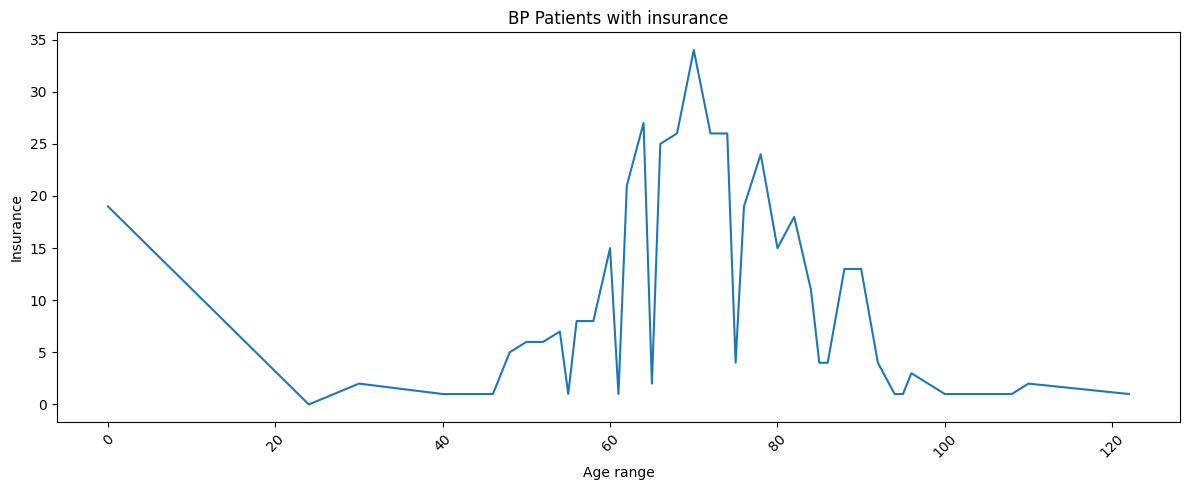

In [45]:

# Group data Blood_Pressire and sum the Insuarance by Age range
insurance_group = train.groupby("Blood_Pressure").sum()

# Plot the sales over time
plt.figure(figsize=(12,5))
plt.plot(insurance_group.index, insurance_group["Insurance"])
plt.title("BP Patients with insurance")
plt.xlabel("Age range")
plt.ylabel("Insurance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
# create a dataframe with numerical columns only
numerical_train = train.select_dtypes(include=['float64', 'int64'])

# calculate the correlation matrix
corr_matrix = numerical_train.corr()

# display the correlation matrix
print(corr_matrix)

                     Plasma_glucose  Blood_Work_Result_1  Blood_Pressure  \
Plasma_glucose             1.000000             0.139541        0.116680   
Blood_Work_Result_1        0.139541             1.000000        0.143064   
Blood_Pressure             0.116680             0.143064        1.000000   
Blood_Work_Result_2       -0.080902             0.054430        0.197535   
Blood_Work_Result_3       -0.054812             0.339818        0.095281   
BMI                        0.033482             0.215949        0.269482   
Blood_Work_Result_4       -0.052230             0.144665        0.008318   
Patient_age                0.532545             0.274057        0.225625   
Insurance                  0.084631             0.050993       -0.025365   

                     Blood_Work_Result_2  Blood_Work_Result_3       BMI  \
Plasma_glucose                 -0.080902            -0.054812  0.033482   
Blood_Work_Result_1             0.054430             0.339818  0.215949   
Blood_Pressure

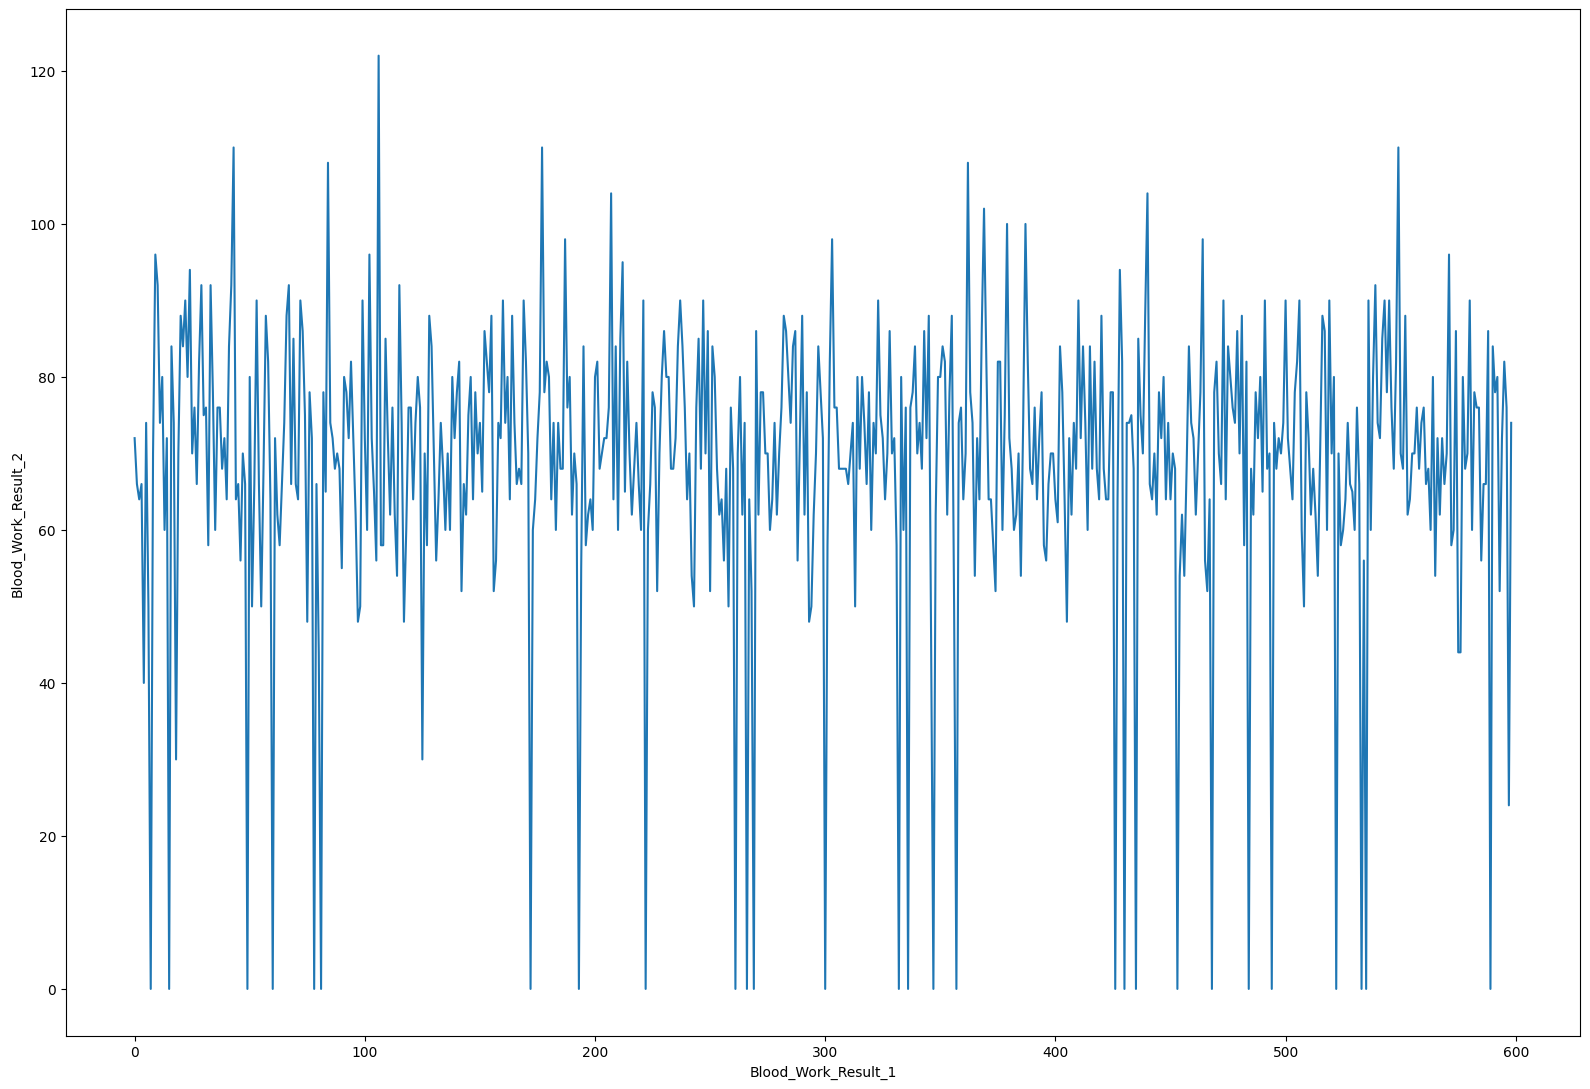

In [47]:
fig, ax = plt.subplots(figsize=(16, 11))
ax.plot(train['Blood_Pressure'])
ax.set_xlabel('Blood_Work_Result_1')
ax.set_ylabel('Blood_Work_Result_2')
plt.tight_layout()


## - Hypothesis Testing
- Hypothesis 1: Higher plasma glucose levels (PRG) are associated with an increased risk of developing sepsis.

- Justification: Elevated glucose levels have been linked to impaired immune function and increased susceptibility to infections, including sepsis.



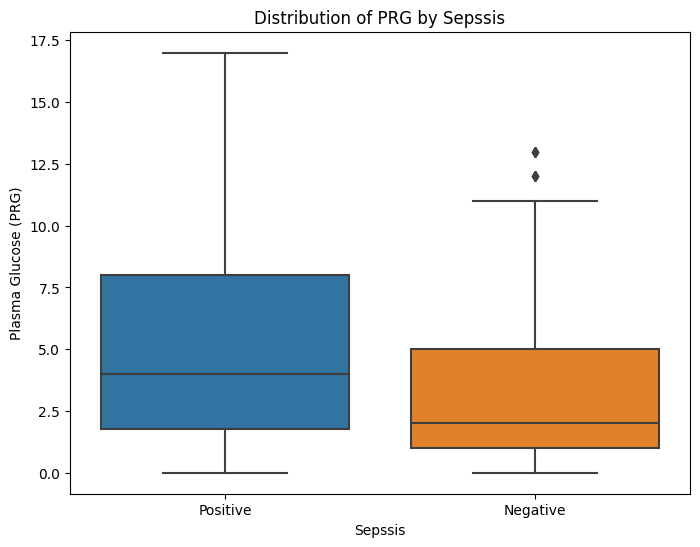

Positive Group:
Mean PRG: 4.778846153846154
Median PRG: 4.0
Standard Deviation: 3.75572151161869

Negative Group:
Mean PRG: 3.317135549872123
Median PRG: 2.0
Standard Deviation: 3.018182162951502

T-Statistic: 5.172721512358376
P-Value: 3.154172341568826e-07


In [48]:
# Split the data into two groups based on sepsis
positive_group = df[df['Sepssis'] == 'Positive']
negative_group = df[df['Sepssis'] == 'Negative']

# Compare PRG distribution between the two groups
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sepssis', y='PRG') 
plt.xlabel('Sepssis')
plt.ylabel('Plasma Glucose (PRG)')
plt.title('Distribution of PRG by Sepssis')
plt.show()

# Calculate summary statistics
positive_prg = positive_group['PRG']
negative_prg = negative_group['PRG']

positive_mean = positive_prg.mean()
positive_median = positive_prg.median()
positive_std = positive_prg.std()

negative_mean = negative_prg.mean()
negative_median = negative_prg.median()
negative_std = negative_prg.std()

print('Positive Group:')
print('Mean PRG:', positive_mean)
print('Median PRG:', positive_median)
print('Standard Deviation:', positive_std)
print()

print('Negative Group:')
print('Mean PRG:', negative_mean)
print('Median PRG:', negative_median)
print('Standard Deviation:', negative_std)
print()

# Perform statistical test (e.g., t-test)
t_statistic, p_value = stats.ttest_ind(positive_prg, negative_prg)
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)


### Based on the provided:

Mean PRG (Plasma Glucose) in the Positive Group (patients with sepsis) is 4.78, while in the Negative Group (patients without sepsis) it is 3.32. This suggests that, on average, patients with sepsis tend to have higher plasma glucose levels compared to those without sepsis.

The median PRG in the Positive Group is 4.0, whereas in the Negative Group it is 2.0. The median represents the middle value of a dataset, and it is less affected by extreme values. This further supports the observation that the central tendency of plasma glucose levels is higher in the Positive Group.

The standard deviation of PRG in the Positive Group is 3.76, and in the Negative Group, it is 3.02. The standard deviation measures the dispersion of data points around the mean. In this case, both groups have relatively high standard deviations, indicating considerable variability in plasma glucose levels within each group.

The t-statistic is 5.17, which indicates a significant difference between the means of the Positive and Negative Groups. A larger absolute t-statistic suggests a stronger evidence of a difference between the groups.

The p-value is 3.15e-07, which is very small. This indicates strong evidence against the null hypothesis (no difference between the groups) and suggests that the difference in mean plasma glucose levels between the groups is statistically significant. In other words, there is a significant association between higher plasma glucose levels and the risk of developing sepsis.

## - Hypothesis 2: 
- Abnormal blood work results, such as high values of PL, SK, and BD2, are indicative of a higher likelihood of sepsis.
- #### Justification: Abnormal blood work results may indicate an ongoing infection or an inflammatory response, which are key factors in sepsis development.

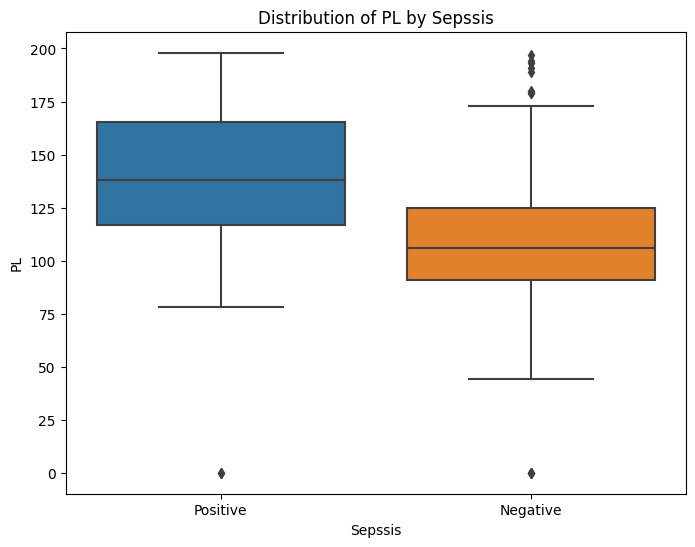

Positive Group (PL):
Mean: 140.28846153846155
Median: 138.0
Standard Deviation: 32.8007225904037

Negative Group (PL):
Mean: 109.44245524296676
Median: 106.0
Standard Deviation: 27.120455674778164

T-Statistic: 12.302534453051374
P-Value: 3.678522495138333e-31
---------------------------


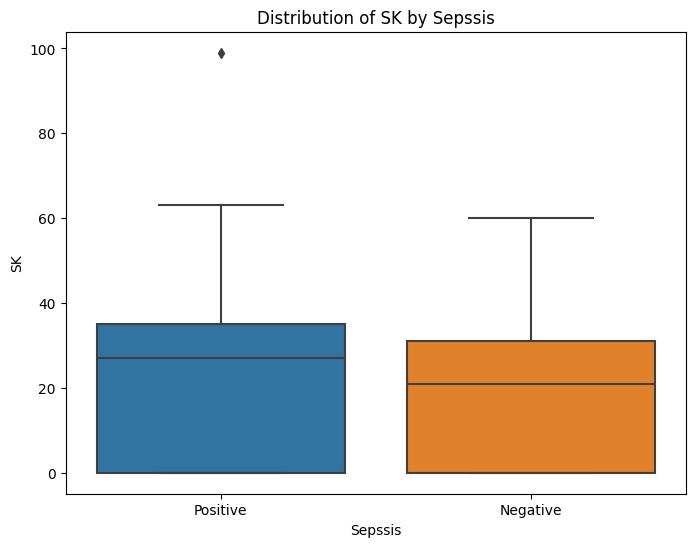

Positive Group (SK):
Mean: 22.221153846153847
Median: 27.0
Standard Deviation: 17.88257821157579

Negative Group (SK):
Mean: 19.680306905370845
Median: 21.0
Standard Deviation: 14.880122549396384

T-Statistic: 1.852114423904815
P-Value: 0.06450285034380407
---------------------------


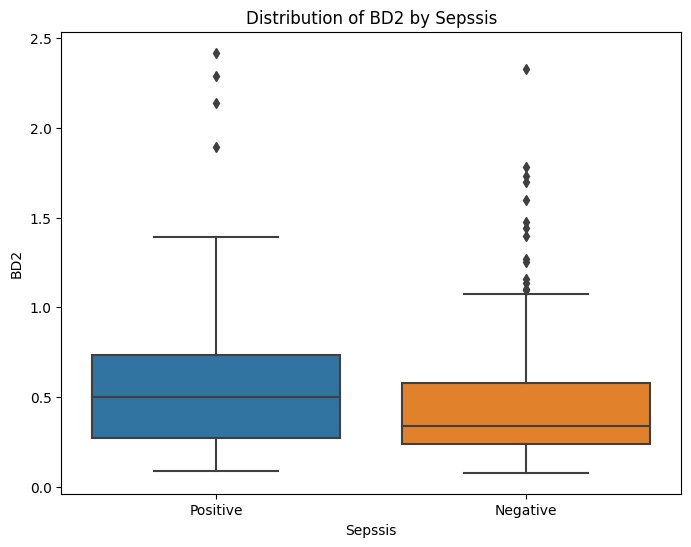

Positive Group (BD2):
Mean: 0.5651442307692308
Median: 0.499
Standard Deviation: 0.3828026047056808

Negative Group (BD2):
Mean: 0.43652429667519177
Median: 0.34
Standard Deviation: 0.30194936542399425

T-Statistic: 4.511169534202187
P-Value: 7.765417586403595e-06
---------------------------


In [49]:
# Split the data into two groups based on sepsis
positive_group = df[df['Sepssis'] == 'Positive']
negative_group = df[df['Sepssis'] == 'Negative']

# Variables to compare
variables = ['PL', 'SK', 'BD2']

# Compare variable distributions between the two groups
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Sepssis', y=var)
    plt.xlabel('Sepssis')
    plt.ylabel(var)
    plt.title(f'Distribution of {var} by Sepssis')
    plt.show()

    # Calculate summary statistics
    positive_var = positive_group[var]
    negative_var = negative_group[var]

    positive_mean = positive_var.mean()
    positive_median = positive_var.median()
    positive_std = positive_var.std()

    negative_mean = negative_var.mean()
    negative_median = negative_var.median()
    negative_std = negative_var.std()

    print(f'Positive Group ({var}):')
    print('Mean:', positive_mean)
    print('Median:', positive_median)
    print('Standard Deviation:', positive_std)
    print()

    print(f'Negative Group ({var}):')
    print('Mean:', negative_mean)
    print('Median:', negative_median)
    print('Standard Deviation:', negative_std)
    print()

    # Perform statistical test (e.g., t-test)
    t_statistic, p_value = stats.ttest_ind(positive_var, negative_var)
    print('T-Statistic:', t_statistic)
    print('P-Value:', p_value)
    print('---------------------------')


The results of the hypothesis testing for abnormal blood work results (PL, SK, BD2) as indicators of sepsis are as follows:

### PL (Attribute 2):
The positive group (sepsis) has a higher mean (140.29) compared to the negative group (109.44), indicating that patients with sepsis tend to have higher PL levels.

The median value for both groups (138.0 for positive and 106.0 for negative) also shows a similar trend.

The standard deviation is higher in the positive group (32.80) compared to the negative group (27.12), suggesting more variability in PL levels among sepsis patients.

The t-statistic (12.30) is significantly different from zero, indicating a significant difference in PL levels between the two groups.

The p-value (3.68e-31) is very small, indicating strong evidence to reject the null hypothesis that there is no difference in PL levels between the groups. This suggests that higher PL levels are associated with a higher likelihood of sepsis.

### SK (Attribute 4):
The mean SK level is slightly higher in the positive group (22.22) compared to the negative group (19.68), but the difference is not as pronounced as in PL.
The median values are 27.0 for the positive group and 21.0 for the negative group, showing a similar pattern.
The standard deviation is also slightly higher in the positive group (17.88) compared to the negative group (14.88).
The t-statistic (1.85) is smaller compared to PL, indicating a less significant difference in SK levels between the two groups.
The p-value (0.06) is relatively higher than the conventional significance level of 0.05, suggesting weaker evidence to reject the null hypothesis. This means that the difference in SK levels between the groups may not be statistically significant.

### BD2 (Attribute 7):
The positive group has a higher mean BD2 level (0.57) compared to the negative group (0.44), indicating a potential association between higher BD2 levels and sepsis.
The median values for both groups also show a similar trend.
The standard deviation is higher in the positive group (0.38) compared to the negative group (0.30), suggesting more variability in BD2 levels among sepsis patients.
The t-statistic (4.51) is significantly different from zero, indicating a significant difference in BD2 levels between the groups.
The p-value (7.77e-06) is very small, providing strong evidence to reject the null hypothesis and suggesting that higher BD2 levels are associated with a higher likelihood of sepsis.

In summary, the results suggest that abnormal blood work results, specifically higher levels of PL and BD2, are indicative of a higher likelihood of sepsis. The results for SK show a trend towards higher levels in the positive group but with weaker statistical significance.

## - Hypothesis 3: Older patients are more likely to develop sepsis compared to younger patients.
- Justification: Advanced age is a known risk factor for sepsis, as the immune system weakens with age and may be less able to mount an effective response to infections.

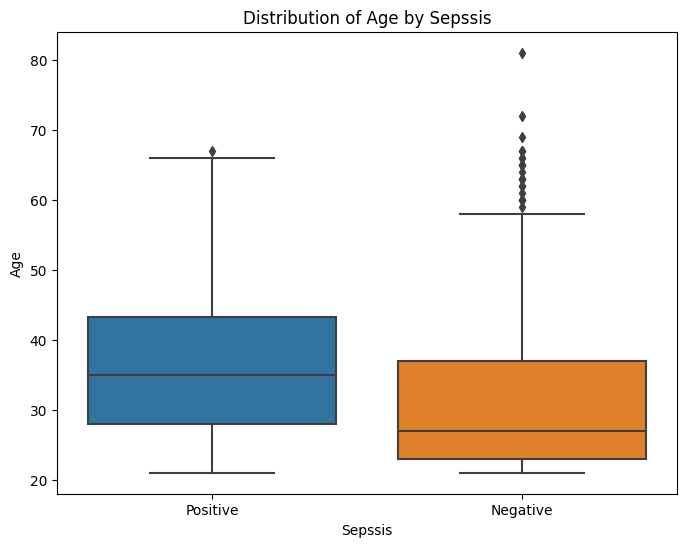

Positive Group:
Mean Age: 36.69711538461539
Median Age: 35.0
Standard Deviation: 10.904929140599736

Negative Group:
Mean Age: 31.47826086956522
Median Age: 27.0
Standard Deviation: 11.913530900036797

T-Statistic: 5.254202967191448
P-Value: 2.0718778891881853e-07


In [50]:
# Compare Age distribution between the positive and negative groups
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sepssis', y='Age')
plt.xlabel('Sepssis')
plt.ylabel('Age')
plt.title('Distribution of Age by Sepssis')
plt.show()

# Split the data into two groups based on sepsis
positive_group = df[df['Sepssis'] == 'Positive']
negative_group = df[df['Sepssis'] == 'Negative']

# Calculate summary statistics
positive_age = positive_group['Age']
negative_age = negative_group['Age']

positive_mean = positive_age.mean()
positive_median = positive_age.median()
positive_std = positive_age.std()

negative_mean = negative_age.mean()
negative_median = negative_age.median()
negative_std = negative_age.std()

print('Positive Group:')
print('Mean Age:', positive_mean)
print('Median Age:', positive_median)
print('Standard Deviation:', positive_std)
print()

print('Negative Group:')
print('Mean Age:', negative_mean)
print('Median Age:', negative_median)
print('Standard Deviation:', negative_std)
print()

# Perform statistical test (e.g., t-test)
t_statistic, p_value = stats.ttest_ind(positive_age, negative_age)
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)


Based on the results of the analysis:

### Positive Group:
Mean Age: 36.70 years Median Age: 35.0 years Standard Deviation: 10.90 years

### Negative Group:
Mean Age: 31.48 years Median Age: 27.0 years Standard Deviation: 11.91 years The t-statistic value is 5.25, and the p-value is 2.07e-07 (very close to zero).

### Interpretation:
The results indicate a statistically significant difference in age between the positive (sepsis) and negative (non-sepsis) groups. The positive group has a higher mean and median age compared to the negative group. Additionally, the standard deviation in the positive group is slightly lower than the negative group, indicating less variability in age among patients with sepsis.

Therefore, based on this analysis, there is evidence to support the hypothesis that older patients are more likely to develop sepsis compared to younger patients. The advanced age of patients may be a risk factor for sepsis, potentially due to the weakening of the immune system with age.

## - Hypothesis 4: Patients with higher body mass index (BMI) values (M11) have a lower risk of sepsis.
- Justification: Obesity has been associated with a dampened immune response, potentially leading to a decreased risk of developing sepsis.

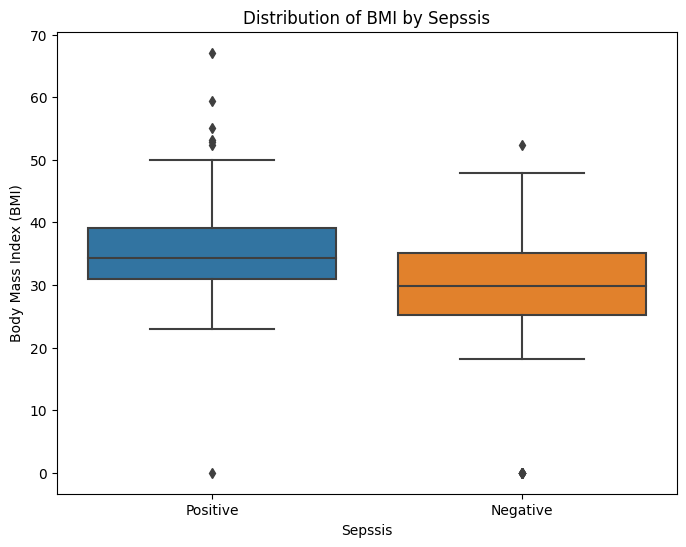

Positive Group:
Mean BMI: 35.385576923076925
Median BMI: 34.3
Standard Deviation: 7.195898164245344

Negative Group:
Mean BMI: 30.076470588235292
Median BMI: 29.9
Standard Deviation: 7.8127318065157585

T-Statistic: 8.134971813407034
P-Value: 2.3972519626645312e-15


In [51]:
# Split the data into two groups based on sepsis
positive_group = df[df['Sepssis'] == 'Positive']
negative_group = df[df['Sepssis'] == 'Negative']

# Compare BMI distribution between the two groups
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sepssis', y='M11')
plt.xlabel('Sepssis')
plt.ylabel('Body Mass Index (BMI)')
plt.title('Distribution of BMI by Sepssis')
plt.show()

# Calculate summary statistics
positive_bmi = positive_group['M11']
negative_bmi = negative_group['M11']

positive_mean = positive_bmi.mean()
positive_median = positive_bmi.median()
positive_std = positive_bmi.std()

negative_mean = negative_bmi.mean()
negative_median = negative_bmi.median()
negative_std = negative_bmi.std()

print('Positive Group:')
print('Mean BMI:', positive_mean)
print('Median BMI:', positive_median)
print('Standard Deviation:', positive_std)
print()

print('Negative Group:')
print('Mean BMI:', negative_mean)
print('Median BMI:', negative_median)
print('Standard Deviation:', negative_std)
print()

# Perform statistical test (e.g., t-test)
t_statistic, p_value = stats.ttest_ind(positive_bmi, negative_bmi)
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)


The results of the analysis for the hypothesis regarding body mass index (BMI) and the risk of sepsis are as follows:
#### Positive Group:
Mean BMI: 35.3856 Median BMI: 34.3 Standard Deviation: 7.1959

#### Negative Group:
Mean BMI: 30.0765 Median BMI: 29.9 Standard Deviation: 7.8127 T-Statistic: 8.13497 P-Value: 2.39725e-15

#### Interpretation:
The results indicate a statistically significant difference in BMI between the positive sepsis group and the negative sepsis group. The positive sepsis group has a higher mean BMI (35.3856) compared to the negative sepsis group (30.0765). The t-statistic of 8.13497 suggests a substantial difference between the two groups.

Furthermore, the very small p-value of 2.39725e-15 suggests strong evidence against the null hypothesis (no difference in BMI between the groups). In other words, there is a significant association between higher BMI values and a lower risk of sepsis. This supports the hypothesis that patients with higher BMI values are less likely to develop sepsis.

It's important to note that correlation does not imply causation, and additional factors or confounding variables may be influencing this relationship. Therefore, further research and analysis are recommended to gain a deeper understanding of the underlying mechanisms and potential causal relationships.

## - Hypothesis 5: Patients without valid insurance cards are more likely to develop sepsis.
- Justification: Lack of access to healthcare, as indicated by the absence of valid insurance, may delay or hinder early detection and treatment of infections, potentially increasing the risk of sepsis.

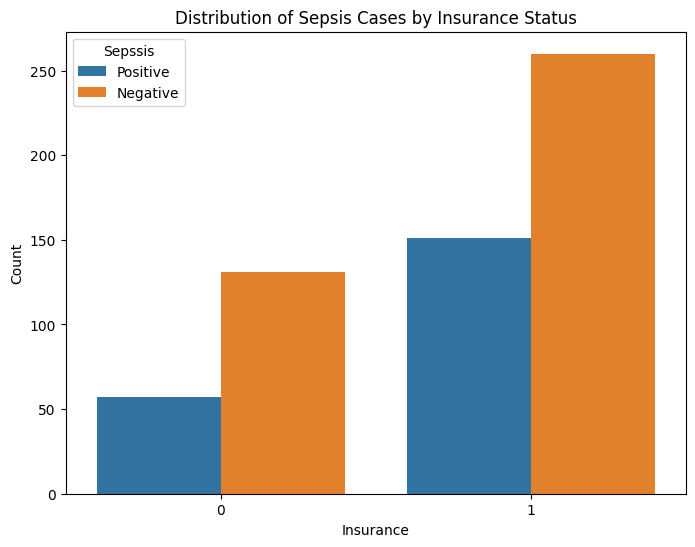

Chi-Square Test of Independence:
Chi-Square: 2.0712782081677066
P-Value: 0.1500956791860619


In [52]:
# Create a countplot to visualize the distribution of sepsis cases by insurance status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Insurance', hue='Sepssis')
plt.xlabel('Insurance')
plt.ylabel('Count')
plt.title('Distribution of Sepsis Cases by Insurance Status')
plt.show()

# Perform a chi-square test of independence to assess the association between insurance and sepsis
crosstab = pd.crosstab(df['Insurance'], df['Sepssis'])
chi2, p_value, _, _ = stats.chi2_contingency(crosstab)

print('Chi-Square Test of Independence:')
print('Chi-Square:', chi2)
print('P-Value:', p_value)


Based on the results of the chi-square test of independence, the chi-square statistic is 2.071 and the p-value is 0.150.
The chi-square statistic measures the strength of association between two categorical variables, in this case, the association between insurance status and sepsis. A higher chi-square value indicates a stronger association.

The p-value is the probability of obtaining the observed association (or a more extreme association) between the variables if there was no true association in the population. In this case, the p-value is 0.150, which is greater than the conventional significance level of 0.05.

Interpreting the results:
Since the p-value is greater than 0.05, we do not have sufficient evidence to reject the null hypothesis. The null hypothesis states that there is no association between insurance status and the likelihood of developing sepsis. Therefore, based on the available data, we cannot conclude that patients without valid insurance cards are more likely to develop sepsis.

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [53]:
# Use pandas.DataFrame.drop_duplicates method

# Check for duplicate rows in train_data
#duplicate_rows = train.duplicated()
#print("Number of duplicate rows:", duplicate_rows.sum())

duplicate_rows = train.duplicated()
print("Number of duplicated rows", duplicate_rows.sum())

Number of duplicated rows 0


## Dataset Splitting

In [54]:
# Use train_test_split with a random_state, and add stratify for Classification  '''''' 

## Impute Missing Values

In [55]:
# Use sklearn.impute.SimpleImputer

# Check for missing values in train_data
#missing_values = train.isna().sum()
#print(missing_values)

missing_values = train.isna().sum()
print(missing_values)

ID                     0
Plasma_glucose         0
Blood_Work_Result_1    0
Blood_Pressure         0
Blood_Work_Result_2    0
Blood_Work_Result_3    0
BMI                    0
Blood_Work_Result_4    0
Patient_age            0
Insurance              0
Sepsis                 0
dtype: int64


## Features Encoding




In [56]:
# From sklearn.preprocessing use OneHotEncoder to encode the categorical features.
# Encoding the target variable
#label_encoder=LabelEncoder()
#train_encoded = label_encoder.fit_transform(train['Sepssis'])


label_encoder = LabelEncoder()
train_encoder = label_encoder.fit_transform(train['Sepsis'])

In [57]:
# Sepsis column targeted to dataframe
target_encoded = pd.DataFrame(train_encoder,columns=['Sepsis'])

In [58]:
# combining the features and the encoded target variables
train_df = pd.concat([train.iloc[:,:-1], target_encoded], axis = 1 )

In [59]:
train_df.drop('ID',axis=1,inplace=True)

In [60]:
#Checking the ddtaframe with droped ID
train_df.head()

,Plasma_glucose,Blood_Work_Result_1,Blood_Pressure,Blood_Work_Result_2,Blood_Work_Result_3,BMI,Blood_Work_Result_4,Patient_age,Insurance,Sepsis
0,6,148,72,35,0,33.6,0.627,50,0,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,1,0
4,0,137,40,35,168,43.1,2.288,33,1,1


## Dataset Splitting

In [61]:
# Use train_test_split with a random_state, and add stratify for Classification

# Split the  data into train and validation sets
#X_train, X_eval, y_train, y_eval = train_test_split(train_df.iloc[:, :-1], train_df.iloc[:, -1:],
                                                   # test_size=0.2, random_state=42, stratify=train_df.iloc[:, -1:])
    
X_train, X_eval, y_train, y_eval = train_test_split(train_df.iloc[:, :-1], train_df.iloc[:, -1:],
                                                   test_size = 0.2, random_state=42, stratify=train_df.iloc[:, -1:])

In [62]:
# Checking shapes of train and eval 
X_train.shape,X_eval.shape,y_train.shape,y_eval.shape

((479, 9), (120, 9), (479, 1), (120, 1))

## Imputing Missing 


In [63]:
# Creating imputer variables
numerical_imputer = SimpleImputer(strategy = "mean")
numerical_imputer.fit(X_train)

X_train_imputed = numerical_imputer.transform(X_train)
X_eval_imputed = numerical_imputer.transform(X_eval)

## Features Scaling 

In [64]:
# From sklearn.preprocessing use StandardScaler, MinMaxScaler, etc.
scaler = StandardScaler()
scaler.fit(X_train_imputed)

X_train_scaled = scaler.transform(X_train_imputed)
X_train_df = pd.DataFrame(X_train_scaled, columns = ['PRG','PL','PR','SK','TS','M11','BD2','Age','Insurance'])

X_eval_scaled = scaler.transform(X_eval_imputed)
X_eval_df = pd.DataFrame(X_eval_scaled, columns = ['PRG','PL','PR','SK','TS','M11','BD2','Age','Insurance'])

In [65]:
#Checking X_train in dataframe
X_train_df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,0.936259,-0.541760,0.292468,1.227874,0.278949,0.706624,-0.824511,0.991413,0.678503
1,0.936259,1.923458,0.812484,0.025886,1.108512,0.534049,0.260234,1.504619,-1.473834
2,-0.563634,-1.197071,0.188465,-0.353689,0.002429,-0.235902,0.149488,-0.719274,0.678503
3,-0.263656,1.892252,-0.227548,0.278936,-0.054783,0.281824,-0.634255,-0.633740,-1.473834
4,-1.163592,-1.103456,-0.227548,0.089149,-0.092923,0.520774,0.143808,-1.061412,0.678503


## Optional: Train set Balancing (for Classification only)

In [66]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

## check for class imbalance

Proportion of Sepsis patients: 0.34724540901502504
Proportion of patients without Sepsis: 0.6527545909849749


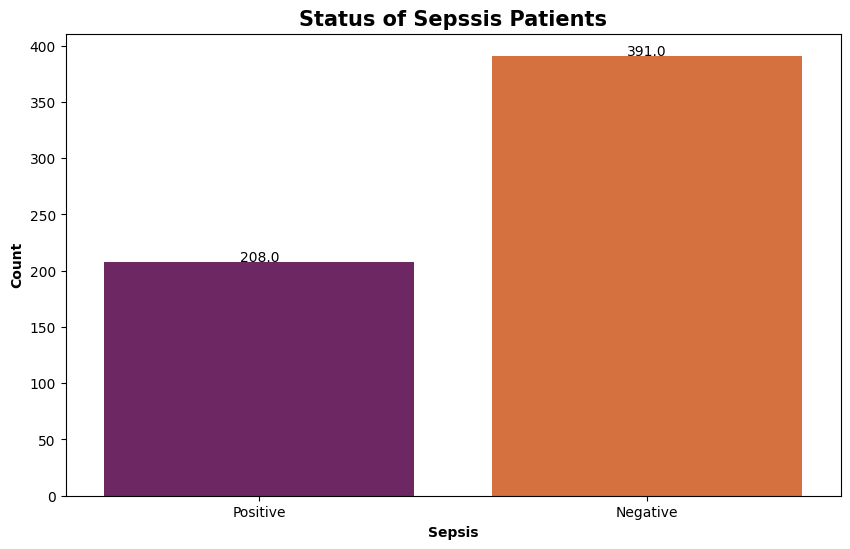

In [67]:
#check for class imbalance
plt.figure(figsize=(10,6))
sep= sns.countplot(data=df,x="Sepssis",palette='inferno') 
sep.set_title('Status of Sepssis Patients',fontsize=15,fontweight='bold')
sep.set_xlabel('Sepsis',fontsize=10,fontweight='bold')
sep.set_ylabel('Count',fontsize=10,fontweight='bold')
for p in sep.patches:
    height = p.get_height()
    sep.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
    
# calculate proportion of churn categories
#churn_prop = churn_counts / len(df)
#print('Churn class proportions:')
#print(churn_prop)

# Calculate proportion of churn categories
sep = train["Sepsis"].value_counts()
proportions = sep / len(df)

# Display proportions
print("Proportion of Sepsis patients:", proportions[1])
print("Proportion of patients without Sepsis:", proportions[0])


In [81]:
X = X_train
y = y_train

In [82]:
from imblearn.over_sampling import RandomOverSampler

## Balancing Dataset - Compared with Imbalance

Class imbalance:
Proportion of Sepsis patients: 0.34724540901502504
Balanced class distribution:
Positive    391
Negative    391
Name: Sepssis, dtype: int64


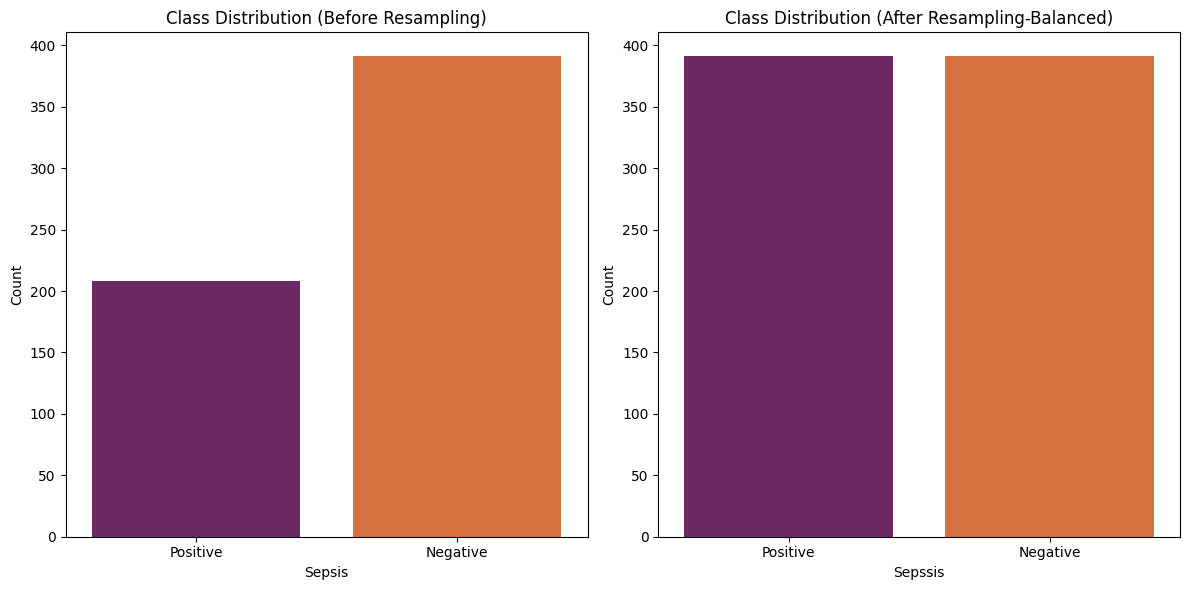

In [106]:
# Calculate class imbalance
class_counts = df["Sepssis"].value_counts()
print("Class imbalance:")
print(class_counts)
print("Proportion of Sepsis patients:", proportions[1])

# Separate features (X) and target variable (y)
X = df.drop("Sepssis", axis=1)
y = df["Sepssis"]

# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=0)

# Resample the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Calculate the balanced class distribution
resampled_class_counts = pd.Series(y_resampled).value_counts()
print("Balanced class distribution:")
print(resampled_class_counts)

# Visualize the class distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the count of Sepsis patients before resampling
sns.countplot(data=df, x="Sepssis", palette='inferno', ax=axes[0])
axes[0].set_title('Class Distribution (Before Resampling)')
axes[0].set_xlabel('Sepsis')
axes[0].set_ylabel('Count')

# Plot the count of Sepsis patients after resampling
sns.countplot(data=pd.DataFrame(y_resampled, columns=["Sepssis"]), x="Sepssis", palette='inferno', ax=axes[1])
axes[1].set_title('Class Distribution (After Resampling-Balanced)')
axes[1].set_xlabel('Sepssis')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## 1. Decision Tree model

### Create the Model

In [84]:
# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

In [85]:
# Fit a decision tree model using the training data
dt_model.fit(X_train, y_train)

# Use the fitted model to make predictions on the test data
dt_pred = dt_model.predict(X_eval)

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, fbeta_score
from sklearn.metrics import confusion_matrix

In [87]:
# Calculate the accuracy, precision, recall, F1 score, and F2 score of the decision tree model
dt_acc = accuracy_score(y_eval, dt_pred)
dt_prec = precision_score(y_eval, dt_pred)
dt_rec = recall_score(y_eval, dt_pred)
dt_f1 = f1_score(y_eval, dt_pred)
dt_f2 = fbeta_score(y_eval, dt_pred, beta=2)

# Calculate the ROC curve of the decision tree model and the area under the curve (AUC)
dt_fpr, dt_tpr, _ = roc_curve(y_eval, dt_pred)
dt_auc = auc(dt_fpr, dt_tpr)

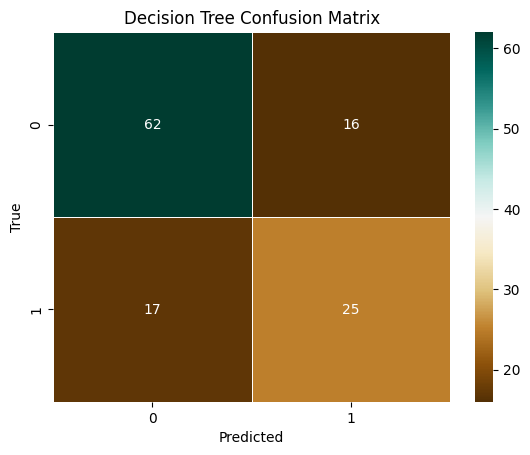

In [88]:
# Calculate the confusion matrix of the decision tree model
dt_cm = confusion_matrix(y_eval, dt_pred)

# Plot the confusion matrix as a heatmap using Seaborn
sns.heatmap(dt_cm, annot=True, linewidth=0.5, fmt=".0f", cmap='BrBG')

plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [89]:
from tabulate import tabulate

In [90]:
# Round the evaluation metrics to 3 decimal places
dt_acc = round(dt_acc, 3)
dt_prec = round(dt_prec, 3)
dt_rec = round(dt_rec, 3)
dt_f1 = round(dt_f1, 3)
dt_f2 = round(dt_f2, 3)
dt_auc = round(dt_auc, 3)


# Create a results table
dt_results_table = [
    ["Decision Tree", dt_acc, dt_prec, dt_rec, dt_f1, dt_f2, dt_auc],
]

# Define column headers
dt_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score", "AUC"]

# Print the results table using tabulate
print(tabulate(dt_results_table, headers=dt_headers))

Model            Accuracy    Precision    Recall    F1 Score    F2 Score    AUC
-------------  ----------  -----------  --------  ----------  ----------  -----
Decision Tree       0.725         0.61     0.595       0.602       0.598  0.695


# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Simple Model #001

Please, keep the following structure to try all the model you want.

## LOGISTIC REGRESSION 

### Create the Model

In [91]:
#fit logistic regression model on train data
Lrmodel = LogisticRegression()

### Train the Model

In [93]:
#fit logistic regression model on train data
Lrmodel.fit(X_train_df, y_train)

#make predictions on validation set
Lrpreds = Lrmodel.predict(X_eval_df)

f1Score =f1_score(y_eval, Lrpreds)
f1Score

0.6265060240963854

## Evaluate the Model on the Evaluation dataset (Evalset) with ROC CURVE

In [94]:
# Calculate the false positive rate, true positive rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_eval, Lrpreds)

# Calculate the AUC (Area Under the Curve) using roc_auc_score
auc_score = roc_auc_score(y_eval, Lrpreds)
auc_score
print(f"auc_score {auc_score}")

auc_score 0.7133699633699634


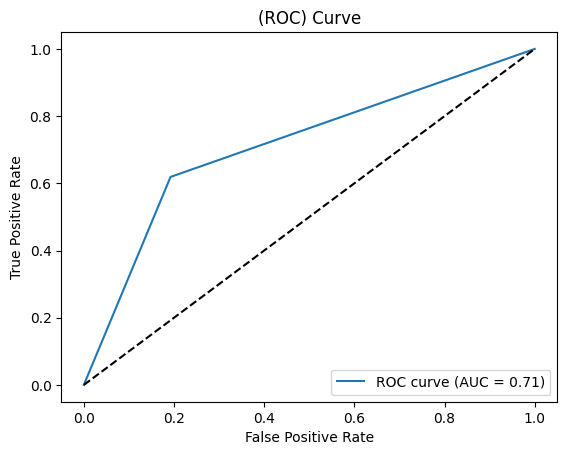

In [174]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In this case, the AUC score of 0.7197802197802198 suggests that the model's performance is relatively good, but there is still room for improvement. It demonstrates that the model's ability to distinguish between the positive and negative classes is better than random guessing, but there may be some misclassifications or areas where the model's predictions could be further refined.

In [175]:
# generate predictions on training set
train_predictions = Lrmodel.predict(X_train_df)
# training accuracy
train_score = f1_score(y_train, train_predictions)



eval_predictions = Lrmodel.predict(X_eval_df)
eval_score = f1_score(y_eval, eval_predictions)
print(f"f1_score on train score {train_score}")
print(f"f1_score on test score {eval_score}")

f1_score on train score 0.6486486486486487
f1_score on test score 0.6265060240963854


Comparing the two scores, we can see that the F1 score on the training dataset (0.649) is slightly higher than the F1 score on the test dataset (0.627). This suggests that the model may be slightly overfitting the training data, as it performs slightly worse on unseen test data

## Simple Model #002

### Decision Tree Model

In [176]:
#fitting decision tree classifier model to the imbalanced train dataset
dt_model =DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_df,y_train)
# evaluating the model
dt_pred=  dt_model.predict(X_eval_df)
f1Score =f1_score(y_eval, dt_pred)
f1Score

0.6024096385542169

In [178]:
# Calculate the false positive rate, true positive rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_eval, dt_pred)

# Calculate the AUC (Area Under the Curve) using roc_auc_score
auc_score = roc_auc_score(y_eval, dt_pred)
auc_score

0.6950549450549451

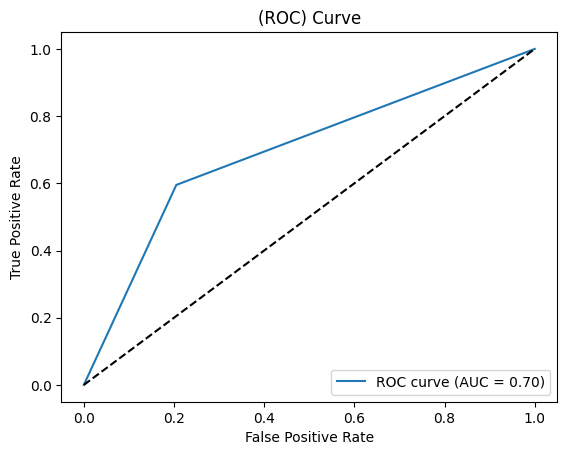

In [179]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [180]:
# generate predictions on training set
train_predictions = dt_model.predict(X_train_df)
# training accuracy
train_score = f1_score(y_train, train_predictions)

eval_predictions = dt_model.predict(X_eval_df)
eval_score = f1_score(y_eval, eval_predictions)
print(f"f1_score on train score {train_score}")
print(f"f1_score on test score {eval_score}")

f1_score on train score 1.0
f1_score on test score 0.6024096385542169


#### Based on the provided f1_score values, it appears that the model is likely overfitting the data.

## Balanced Model #003

In [236]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
#fitting the model with imbalanced train dataset
rf_model.fit(X_train_resampled,y_train_resampled)

# evaluatinng model performance
rfpred= rf_model.predict(X_eval_df)
f1Score = f1_score(y_eval, rfpred)
f1Score

In [ ]:
# Calculate the false positive rate, true positive rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_eval, rfpred)

# Calculate the AUC (Area Under the Curve) using roc_auc_score
auc_score = roc_auc_score(y_eval, rfpred)
auc_score

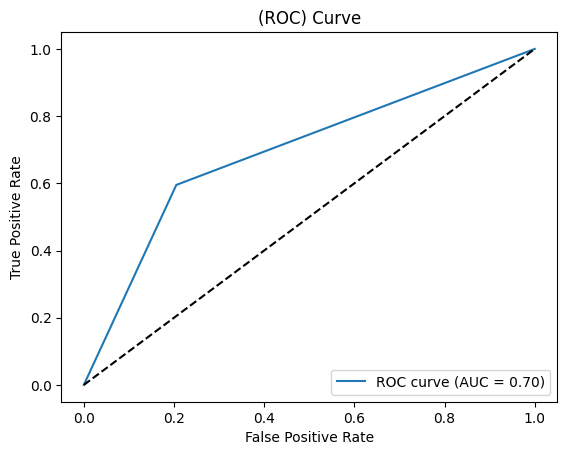

In [190]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# generate predictions on training set
train_predictions = rf_model.predict(X_train_resampled)
# training accuracy
train_score = f1_score(y_train_resampled, train_predictions)

eval_predictions = rf_model.predict(X_eval_df)
eval_score = f1_score(y_eval, eval_predictions)
print(f"f1_score on train score {train_score}")
print(f"f1_score on test score {eval_score}")

Based on the provided f1_score values, it appears that the model is likely overfitting the training data.

##  Model #004

In [ ]:
XGBmodel.fit(X_train_resampled,y_train_resampled)

#make predictions on validation set
XGB_preds = XGBmodel.predict(X_eval_df)

f1Score = f1_score(y_eval, XGB_preds)
f1Score


In [ ]:
# Calculate the false positive rate, true positive rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_eval, XGBpreds)

# Calculate the AUC (Area Under the Curve) using roc_auc_score
auc_score = roc_auc_score(y_eval, XGBpreds)
auc_score

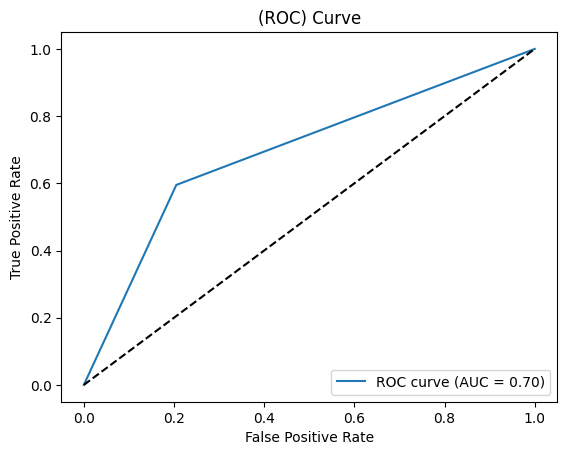

In [205]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# generate predictions on training set
train_predictions = XGBmodel.predict(X_train_df)
# training accuracy
train_score= f1_score(y_train, train_predictions)



eval_predictions = XGBmodel.predict(X_eval_df)
eval_score = f1_score(y_eval, eval_predictions)
print(f"f1_score on train score {train_score}")
print(f"f1_score on test score {eval_score}")

## Simple Model #005

### Naive Bayes

In [ ]:
# Create a Naive Bayes model
nb_model = GaussianNB()
# Train the model on the resampled training data
nb_model.fit(X_train_df, y_train)
#make predictions on validation set
nbpreds = XGBmodel.predict(X_eval_df)

f1Score =f1_score(y_eval, nbpreds)
f1Score

In [ ]:
# Calculate the false positive rate, true positive rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_eval, nbpreds)

# Calculate the AUC (Area Under the Curve) using roc_auc_score
auc_score = roc_auc_score(y_eval, nbpreds)
auc_score

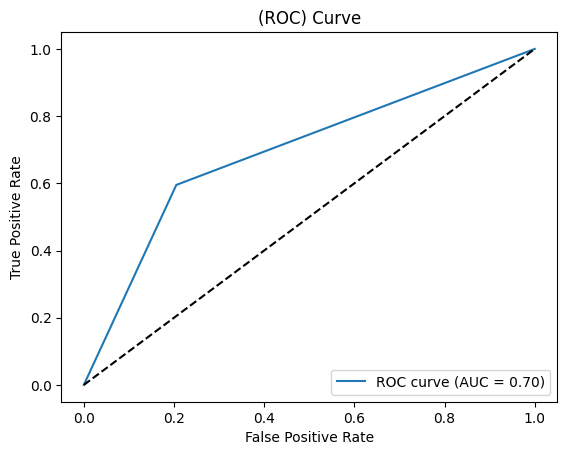

In [209]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [210]:
# generate predictions on training set
train_predictions = nb_model.predict(X_train_df)
# training accuracy
train_score = f1_score(y_train, train_predictions)



eval_predictions = nb_model.predict(X_eval_df)
eval_score = f1_score(y_eval, eval_predictions)
print(f"f1_score on train score {train_score}")
print(f"f1_score on test score {eval_score}")

f1_score on train score 0.6730769230769231
f1_score on test score 0.574712643678161


Based on the provided f1_score values, it appears that the model is overfitting the training data. The f1_score on the training data (0.7715) is considerably higher than the f1_score on the test data (0.5185), indicating that the model is not generalizing well to unseen data.

## Support Vector machines


In [336]:
from sklearn.svm import SVC

### Create the Model

In [337]:
# Create a Support Vector machines model
svm_model = SVC()

### Train Model

In [338]:
# Train the model on the training data
svm_model.fit(X_train, y_train)

# Use the trained model to predict on the test data
svm_pred = svm_model.predict(X_eval)

## Evaluating Model on Eval data

In [339]:
# Calculate accuracy, precision, recall, f1 score, and f2 score
svm_acc = round(accuracy_score(y_eval, svm_pred), 3)
svm_prec = round(precision_score(y_eval, svm_pred), 3)
svm_rec = round(recall_score(y_eval, svm_pred), 3)
svm_f1 = round(f1_score(y_eval, svm_pred), 3)
svm_f2 = round(fbeta_score(y_eval, svm_pred, beta=2), 3)

svm_fpr, svm_tpr, _ = roc_curve(y_eval, svm_pred)
svm_auc = round(auc(svm_fpr, svm_tpr), 3)

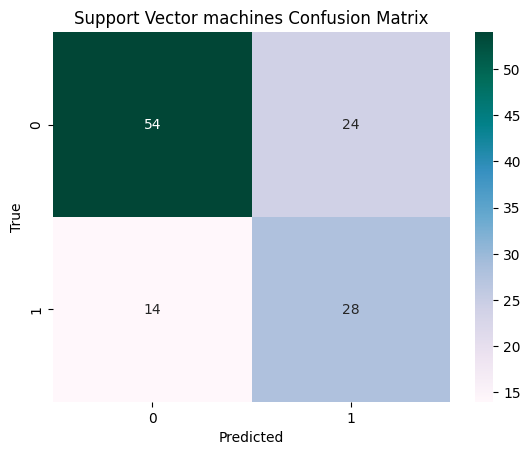

In [349]:
# compute the confusion matrix using true label values and predicted label values
svm_cm = confusion_matrix(y_eval, svm_pred)

# plot the confusion matrix using seaborn heatmap
sns.heatmap(svm_cm, annot=True, fmt=".0f", cmap='PuBuGn')

plt.title("Support Vector machines Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [341]:
# Round the evaluation metrics to 3 decimal places
svm_acc = round(svm_acc, 3)
svm_prec = round(svm_prec, 3)
svm_rec = round(svm_rec, 3)
svm_f1 = round(svm_f1, 3)
svm_f2 = round(svm_f2, 3)
svm_auc = round(svm_auc, 3)


# Support Vector Machines
svm_results_table = [
    ["Support Vector Machines", svm_acc, svm_prec, svm_rec, svm_f1, svm_f2, svm_auc],
]

# Define column headers to validate model accuracy
svm_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]

# Print the Support Vector Machines results table using tabulate
print(tabulate(svm_results_table, headers=svm_headers))

                           Model    Accuracy    Precision    Recall    F1 Score    F2 Score
-----------------------  -------  ----------  -----------  --------  ----------  ----------
Support Vector Machines    0.683       0.538        0.667     0.596       0.636       0.679


## Random Forest Model


### Create the Model

In [342]:
# Create a Random Forest model
rf_model = RandomForestClassifier()

## Train Model

In [343]:
# Train the model on the training data
rf_model.fit(X_train, y_train)

# Use the trained model to predict on the test data
rf_pred = rf_model.predict(X_eval)

## Evaluating Model

In [344]:
# Calculate accuracy, precision, recall, f1 score, and f2 score
rf_acc = round(accuracy_score(y_eval, rf_pred), 3)
rf_prec = round(precision_score(y_eval, rf_pred), 3)
rf_rec = round(recall_score(y_eval, rf_pred), 3)
rf_f1 = round(f1_score(y_eval, rf_pred), 3)
#rf_f2 = round(fbeta_score(y_test, rf_pred, beta=2), 3)

# Calculate the false positive rate, true positive rate, and AUC for the ROC curve
rf_fpr, rf_tpr, _ = roc_curve(y_eval, rf_pred)
rf_auc = round(auc(rf_fpr, rf_tpr), 3)

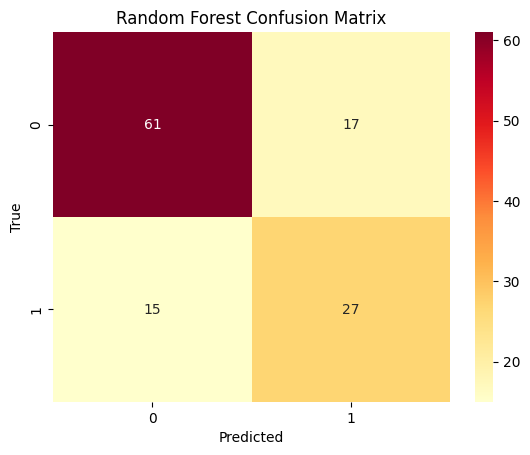

In [348]:
# compute the confusion matrix using true label values and predicted label values
rf_cm = confusion_matrix(y_eval, rf_pred)

# plot the confusion matrix using seaborn heatmap with annotations and color map
sns.heatmap(rf_cm, annot=True, fmt=".0f", cmap='YlOrRd')


plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

## Models comparison & Model Selection

In [115]:
# Instantiate the models
dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression()
#xgb_model = XGBClassifier()
nb_model = GaussianNB()
svm_model = SVC()
rf_model = RandomForestClassifier()

# Create a list of model names and models
models = [
    ("Decision Tree", dt_model),
    ("Logistic Regression", lr_model),
    #("XGBoost", xgb_model),
    ("Naive Bayes", nb_model),
    ("Support Vector Machines", svm_model),
    ("Random Forest", rf_model)
]

# Create an empty dataframe
model_comparison_df = pd.DataFrame(columns=["Model", "Accuracy", "F1 Score", "F2 Score"])

# Iterate over the models and evaluate performance
for model_name, model in models:
    # Train the model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_eval)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_eval, y_pred)
    f1 = f1_score(y_eval, y_pred)
    f2 = fbeta_score(y_eval, y_pred, beta=2)
    
    # Append to dataframe
    model_comparison_df = model_comparison_df.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "F2 Score": f2
    }, ignore_index=True)

# Display the model comparison dataframe
print(model_comparison_df)

# View model accuracy in table
sorted_table = model_comparison_df.sort_values(by=['Accuracy'], ascending=False)
sorted_table 

                     Model  Accuracy  F1 Score  F2 Score
0            Decision Tree  0.725000  0.602410  0.598086
1      Logistic Regression  0.750000  0.634146  0.625000
2              Naive Bayes  0.691667  0.574713  0.586854
3  Support Vector Machines  0.716667  0.564103  0.539216
4            Random Forest  0.683333  0.547619  0.547619


,Model,Accuracy,F1 Score,F2 Score
1,Logistic Regression,0.750000,0.634146,0.625000
0,Decision Tree,0.725000,0.602410,0.598086
3,Support Vector Machines,0.716667,0.564103,0.539216
2,Naive Bayes,0.691667,0.574713,0.586854
4,Random Forest,0.683333,0.547619,0.547619


## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [211]:
# Define the hyperparameters grid
param_grid = {
    'C': [10,30,50,70,80,100] ,  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'saga'],  # Solver algorithm for optimization
    'max_iter': [10,20,30,40,50]  # Maximum number of iterations
}

# Create a logistic regression model
#lr_model = LogisticRegression()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(Lrmodel, param_grid, scoring='f1')
grid_search.fit(X_train_df, y_train)

# Get the best logistic regression model
best_lr_model = grid_search.best_estimator_
best_lr_model

LogisticRegression(C=10, max_iter=10, solver='liblinear')

In [212]:
# Make predictions on the evaluation set using the best model
lr_preds = best_lr_model.predict(X_eval_df)

# Calculate the F1 score
f1Score = f1_score(y_eval, lr_preds)
f1Score

0.6265060240963854

In [213]:
# Calculate the false positive rate, true positive rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_eval, lr_preds)

# Calculate the AUC (Area Under the Curve) using roc_auc_score
auc_score = roc_auc_score(y_eval, lr_preds)
auc_score

0.7133699633699634

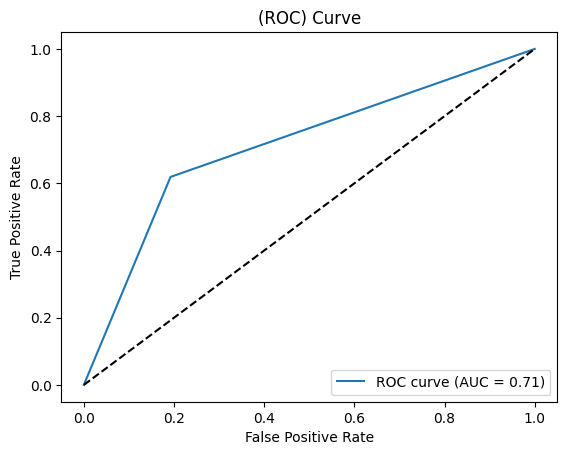

In [214]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# generate predictions on training set
train_predictions = best_lr_model.predict(X_train_resampled)
# training accuracy
train_score= f1_score(y_train_resampled,train_predictions)

eval_predictions = best_lr_model.predict(X_eval_df)
eval_score = f1_score(y_eval, eval_predictions)
print(f"f1_score on train score {train_score}")
print(f"f1_score on test score {eval_score}")

### Define the hyperparameters grid

In [ ]:
# Define the hyperparameters grid
param_grid = {
    'C': [10,30,50,70,80,100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'saga'],  # Solver algorithm for optimization
    'max_iter': [10,20,30,40,50]  # Maximum number of iterations
}

# Create a logistic regression model
#lr_model = LogisticRegression()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(Lrmodel, param_grid, scoring='f1')
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best logistic regression model
best_lr_model = grid_search.best_estimator_
best_lr_model

In [217]:
# Make predictions on the evaluation set using the best model
lr_preds = best_lr_model.predict(X_eval_df)

# Calculate the F1 score
f1Score = f1_score(y_eval, lr_preds)
f1Score

0.6265060240963854

In [218]:
# Calculate the false positive rate, true positive rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_eval, lr_preds)

# Calculate the AUC (Area Under the Curve) using roc_auc_score
auc_score = roc_auc_score(y_eval, lr_preds)
auc_score


0.7133699633699634

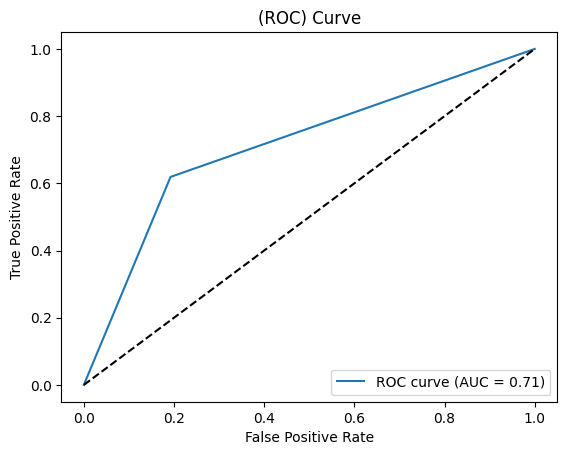

In [219]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# generate predictions on training set
train_predictions = best_lr_model.predict(X_train_resampled)
# training accuracy
train_score =f1_score(y_train_resampled, train_predictions)

eval_predictions = best_lr_model.predict(X_eval)
eval_score= f1_score(y_eval, eval_predictions)
print(f"f1_score on train score {train_score}")
print(f"f1_score on test score {eval_score}")

Based on the provided f1_score values, it appears that the model is likely overfitting the training data.

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [67]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app

In [221]:
#creating a file path to save all the componets in.
if not os.path.exists("key_comp"):
    os.makedirs("key_comp")

In [222]:
# set the destination path to the "export" directory
destination = os.path.join(".", "key_comp")

In [223]:
components_clf = {
    "num_imputer":numerical_imputer,
    "scaler": scaler,
    "models": Lrmodel 
}

In [224]:
# Export the KNN model
with open(os.path.join(destination, "Lrmodel.pkl"), "wb") as f:
    pickle.dump(components_clf, f)

In [225]:
!pip list --format=freeze >key_comp/requirements.txt